In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Flight_price=pd.read_csv("Flight_Prediction.csv")
Flight_price

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

This is Regression problem, String data is present which needs to be encoded.

In [3]:
Flight_price.shape

(10683, 11)

In the given dataset we have 10683 rows and 11 columns

In [4]:
Flight_price.head(10)

Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info  Price  
0                      No info   3897  
1                      No info   7662  
2                      No info  13882  
3                      No info   6218  
4                      No info  13302  
5                      No info   3873  
6  In-flight meal not included  11087  
7                      No info  22270  
8  In-flight meal not included  11087  
9                      No info   8625

In [5]:
Flight_price.tail(10)

Airline Date_of_Journey    Source Destination  \
10673        Jet Airways      27/05/2019     Delhi      Cochin   
10674        Jet Airways      12/03/2019  Banglore   New Delhi   
10675          Air India       9/06/2019    Mumbai   Hyderabad   
10676  Multiple carriers       1/05/2019     Delhi      Cochin   
10677           SpiceJet      21/05/2019  Banglore       Delhi   
10678           Air Asia       9/04/2019   Kolkata    Banglore   
10679          Air India      27/04/2019   Kolkata    Banglore   
10680        Jet Airways      27/04/2019  Banglore       Delhi   
10681            Vistara      01/03/2019  Banglore   New Delhi   
10682          Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
10673  DEL → AMD → BOM → COK    13:25  04:25 28 May      15h     2 stops   
10674        BLR → BOM → DEL    20:35  21:20 13 Mar  24h 45m      1 stop   
10675              BOM → HYD    06:20         07:40   1h 20m    non-stop   
10676        DEL → BOM → COK    10:20         19:00   8h 40m      1 stop   
10677              BLR → DEL    05:55         08:35   2h 40m    non-stop   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

                    Additional_Info  Price  
10673                       No info  16704  
10674   In-flight meal not included  11087  
10675                       No info   3100  
10676                       No info   9794  
10677  No check-in baggage included   3257  
10678                       No info   4107  
10679                       No info   4145  
10680                       No info   7229  
10681                       No info  12648  
10682                       No info  11753

In [6]:
Flight_price.sample(10)

Airline Date_of_Journey    Source Destination  \
1091         Jet Airways       1/04/2019   Kolkata    Banglore   
10094             IndiGo      12/05/2019    Mumbai   Hyderabad   
5748              IndiGo      27/05/2019     Delhi      Cochin   
3068              IndiGo      18/03/2019   Chennai     Kolkata   
4776            SpiceJet       9/04/2019   Kolkata    Banglore   
1494   Multiple carriers      27/03/2019     Delhi      Cochin   
8829             Vistara       6/03/2019    Mumbai   Hyderabad   
3694              IndiGo      27/04/2019  Banglore       Delhi   
4391               GoAir      27/05/2019  Banglore       Delhi   
10186          Air India      18/05/2019     Delhi      Cochin   

                 Route Dep_Time  Arrival_Time Duration Total_Stops  \
1091   CCU → BOM → BLR    18:55  23:35 02 Apr  28h 40m      1 stop   
10094        BOM → HYD    20:05         21:40   1h 35m    non-stop   
5748   DEL → BOM → COK    04:55         21:00   16h 5m      1 stop   
3068         MAA → CCU    11:35         14:00   2h 25m    non-stop   
4776         CCU → BLR    06:55         09:30   2h 35m    non-stop   
1494   DEL → HYD → COK    07:05         16:10    9h 5m      1 stop   
8829   BOM → DEL → HYD    20:55  22:55 07 Mar      26h      1 stop   
3694         BLR → DEL    00:30         03:25   2h 55m    non-stop   
4391         BLR → DEL    07:45         10:40   2h 55m    non-stop   
10186        DEL → COK    14:10         17:10       3h    non-stop   

      Additional_Info  Price  
1091          No info  12681  
10094         No info   2227  
5748          No info   8784  
3068          No info   3858  
4776          No info   3873  
1494          No info   6076  
8829          No info  12395  
3694          No info   4591  
4391          No info   3419  
10186         No info   6934

In [7]:
Flight_price.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## DataFrame Description

Flight ticket price prediction is today seeing a wide variation in price, Flight price changes on daily basis. In the given dataset we have been provided with factors/features deciding the price changes in the flight price prediction.
In the dataset we have various features having different meanings like Airline column depicts the name of the airline. Date_of_Journey column depicts the date of journey of the passenger. Source column depicts the source from which airline service starts. Destination column depicts where the service ends. Route is the route of the flight taken to reach the destination. Dep_Time denotes the time when the journey starts from the source. Arrival_Time denotes the arrival time at destination, Duration tells us about the total stops between the source and the destination. Additional_Info tells us about the additional information about the flight and Price column tells us about the Price of the ticket. 

### Checking the Datatypes of the columns

In [8]:
Flight_price.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
Flight_price.loc[Flight_price["Price"]== " "] #for checking empty value

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []

In [10]:
# converting object to datetime datatype
Flight_price['Date_of_Journey']=pd.to_datetime(Flight_price['Date_of_Journey'])
Flight_price['Dep_Time']=pd.to_datetime(Flight_price['Dep_Time'])
Flight_price['Arrival_Time']=pd.to_datetime(Flight_price['Arrival_Time'])

In [11]:
Flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [12]:
# adding new column day,month,year in dataframe 
Flight_price['Date_of_Journey_date']=Flight_price['Date_of_Journey'].dt.day
Flight_price['Date_of_Journey_month']=Flight_price['Date_of_Journey'].dt.month
Flight_price['Date_of_Journey_year']=Flight_price['Date_of_Journey'].dt.year
Flight_price

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-01-05   Kolkata    Banglore   
2      Jet Airways      2019-09-06     Delhi      Cochin   
3           IndiGo      2019-12-05   Kolkata    Banglore   
4           IndiGo      2019-01-03  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-09-04   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-01-03  Banglore   New Delhi   
10682    Air India      2019-09-05     Delhi      Cochin   

                       Route            Dep_Time        Arrival_Time Duration  \
0                  BLR → DEL 2021-11-11 22:20:00 2021-03-22 01:10:00   2h 50m   
1      CCU → IXR → BBI → BLR 2021-11-11 05:50:00 2021-11-11 13:15:00   7h 25m   
2      DEL → LKO → BOM → COK 2021-11-11 09:25:00 2021-06-10 04:25:00      19h   
3            CCU → NAG → BLR 2021-11-11 18:05:00 2021-11-11 23:30:00   5h 25m   
4            BLR → NAG → DEL 2021-11-11 16:50:00 2021-11-11 21:35:00   4h 45m   
...                      ...                 ...                 ...      ...   
10678              CCU → BLR 2021-11-11 19:55:00 2021-11-11 22:25:00   2h 30m   
10679              CCU → BLR 2021-11-11 20:45:00 2021-11-11 23:20:00   2h 35m   
10680              BLR → DEL 2021-11-11 08:20:00 2021-11-11 11:20:00       3h   
10681              BLR → DEL 2021-11-11 11:30:00 2021-11-11 14:10:00   2h 40m   
10682  DEL → GOI → BOM → COK 2021-11-11 10:55:00 2021-11-11 19:15:00   8h 20m   

      Total_Stops Additional_Info  Price  Date_of_Journey_date  \
0        non-stop         No info   3897                    24   
1         2 stops         No info   7662                     5   
2         2 stops         No info  13882                     6   
3          1 stop         No info   6218                     5   
4          1 stop         No info  13302                     3   
...           ...             ...    ...                   ...   
10678    non-stop         No info   4107                     4   
10679    non-stop         No info   4145                    27   
10680    non-stop         No info   7229                    27   
10681    non-stop         No info  12648                     3   
10682     2 stops         No info  11753                     5   

       Date_of_Journey_month  Date_of_Journey_year  
0                          3                  2019  
1                          1                  2019  
2                          9                  2019  
3                         12                  2019  
4                          1                  2019  
...                      ...                   ...  
10678                      9                  2019  
10679                      4                  2019  
10680                      4                  2019  
10681                      1                  2019  
10682                      9                  2019  

[10683 rows x 14 columns]

In [13]:
# adding new column day,month,year in dataframe 
Flight_price['Dep_Time_hour']=Flight_price['Dep_Time'].dt.hour
Flight_price['Dep_Time_minute']=Flight_price['Dep_Time'].dt.minute
Flight_price

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-01-05   Kolkata    Banglore   
2      Jet Airways      2019-09-06     Delhi      Cochin   
3           IndiGo      2019-12-05   Kolkata    Banglore   
4           IndiGo      2019-01-03  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-09-04   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-01-03  Banglore   New Delhi   
10682    Air India      2019-09-05     Delhi      Cochin   

                       Route            Dep_Time        Arrival_Time Duration  \
0                  BLR → DEL 2021-11-11 22:20:00 2021-03-22 01:10:00   2h 50m   
1      CCU → IXR → BBI → BLR 2021-11-11 05:50:00 2021-11-11 13:15:00   7h 25m   
2      DEL → LKO → BOM → COK 2021-11-11 09:25:00 2021-06-10 04:25:00      19h   
3            CCU → NAG → BLR 2021-11-11 18:05:00 2021-11-11 23:30:00   5h 25m   
4            BLR → NAG → DEL 2021-11-11 16:50:00 2021-11-11 21:35:00   4h 45m   
...                      ...                 ...                 ...      ...   
10678              CCU → BLR 2021-11-11 19:55:00 2021-11-11 22:25:00   2h 30m   
10679              CCU → BLR 2021-11-11 20:45:00 2021-11-11 23:20:00   2h 35m   
10680              BLR → DEL 2021-11-11 08:20:00 2021-11-11 11:20:00       3h   
10681              BLR → DEL 2021-11-11 11:30:00 2021-11-11 14:10:00   2h 40m   
10682  DEL → GOI → BOM → COK 2021-11-11 10:55:00 2021-11-11 19:15:00   8h 20m   

      Total_Stops Additional_Info  Price  Date_of_Journey_date  \
0        non-stop         No info   3897                    24   
1         2 stops         No info   7662                     5   
2         2 stops         No info  13882                     6   
3          1 stop         No info   6218                     5   
4          1 stop         No info  13302                     3   
...           ...             ...    ...                   ...   
10678    non-stop         No info   4107                     4   
10679    non-stop         No info   4145                    27   
10680    non-stop         No info   7229                    27   
10681    non-stop         No info  12648                     3   
10682     2 stops         No info  11753                     5   

       Date_of_Journey_month  Date_of_Journey_year  Dep_Time_hour  \
0                          3                  2019             22   
1                          1                  2019              5   
2                          9                  2019              9   
3                         12                  2019             18   
4                          1                  2019             16   
...                      ...                   ...            ...   
10678                      9                  2019             19   
10679                      4                  2019             20   
10680                      4                  2019              8   
10681                      1                  2019             11   
10682                      9                  2019             10   

       Dep_Time_minute  
0                   20  
1                   50  
2                   25  
3                    5  
4                   50  
...                ...  
10678               55  
10679               45  
10680               20  
10681               30  
10682               55  

[10683 rows x 16 columns]

In [14]:
# adding new column day,month,year in dataframe 
Flight_price['Arrival_Time_date']=Flight_price['Arrival_Time'].dt.day
Flight_price['Arrival_Time_month']=Flight_price['Arrival_Time'].dt.month
Flight_price['Arrival_Time_year']=Flight_price['Arrival_Time'].dt.year
Flight_price['Arrival_Time_hour']=Flight_price['Arrival_Time'].dt.hour
Flight_price['Arrival_Time_minute']=Flight_price['Arrival_Time'].dt.minute
Flight_price

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-01-05   Kolkata    Banglore   
2      Jet Airways      2019-09-06     Delhi      Cochin   
3           IndiGo      2019-12-05   Kolkata    Banglore   
4           IndiGo      2019-01-03  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-09-04   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-01-03  Banglore   New Delhi   
10682    Air India      2019-09-05     Delhi      Cochin   

                       Route            Dep_Time        Arrival_Time Duration  \
0                  BLR → DEL 2021-11-11 22:20:00 2021-03-22 01:10:00   2h 50m   
1      CCU → IXR → BBI → BLR 2021-11-11 05:50:00 2021-11-11 13:15:00   7h 25m   
2      DEL → LKO → BOM → COK 2021-11-11 09:25:00 2021-06-10 04:25:00      19h   
3            CCU → NAG → BLR 2021-11-11 18:05:00 2021-11-11 23:30:00   5h 25m   
4            BLR → NAG → DEL 2021-11-11 16:50:00 2021-11-11 21:35:00   4h 45m   
...                      ...                 ...                 ...      ...   
10678              CCU → BLR 2021-11-11 19:55:00 2021-11-11 22:25:00   2h 30m   
10679              CCU → BLR 2021-11-11 20:45:00 2021-11-11 23:20:00   2h 35m   
10680              BLR → DEL 2021-11-11 08:20:00 2021-11-11 11:20:00       3h   
10681              BLR → DEL 2021-11-11 11:30:00 2021-11-11 14:10:00   2h 40m   
10682  DEL → GOI → BOM → COK 2021-11-11 10:55:00 2021-11-11 19:15:00   8h 20m   

      Total_Stops Additional_Info  ...  Date_of_Journey_date  \
0        non-stop         No info  ...                    24   
1         2 stops         No info  ...                     5   
2         2 stops         No info  ...                     6   
3          1 stop         No info  ...                     5   
4          1 stop         No info  ...                     3   
...           ...             ...  ...                   ...   
10678    non-stop         No info  ...                     4   
10679    non-stop         No info  ...                    27   
10680    non-stop         No info  ...                    27   
10681    non-stop         No info  ...                     3   
10682     2 stops         No info  ...                     5   

       Date_of_Journey_month  Date_of_Journey_year  Dep_Time_hour  \
0                          3                  2019             22   
1                          1                  2019              5   
2                          9                  2019              9   
3                         12                  2019             18   
4                          1                  2019             16   
...                      ...                   ...            ...   
10678                      9                  2019             19   
10679                      4                  2019             20   
10680                      4                  2019              8   
10681                      1                  2019             11   
10682                      9                  2019             10   

       Dep_Time_minute  Arrival_Time_date  Arrival_Time_month  \
0                   20                 22                   3   
1                   50                 11                  11   
2                   25                 10                   6   
3                    5                 11                  11   
4                   50                 11                  11   
...                ...                ...                 ...   
10678               55                 11                  11   
10679               45                 11                  11   
10680               20                 11                  11   
10681               30                 11                  11   
1068

In [15]:
Flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10683 non-null  object        
 1   Date_of_Journey        10683 non-null  datetime64[ns]
 2   Source                 10683 non-null  object        
 3   Destination            10683 non-null  object        
 4   Route                  10682 non-null  object        
 5   Dep_Time               10683 non-null  datetime64[ns]
 6   Arrival_Time           10683 non-null  datetime64[ns]
 7   Duration               10683 non-null  object        
 8   Total_Stops            10682 non-null  object        
 9   Additional_Info        10683 non-null  object        
 10  Price                  10683 non-null  int64         
 11  Date_of_Journey_date   10683 non-null  int64         
 12  Date_of_Journey_month  10683 non-null  int64         
 13  D

In [16]:
Flight_price=Flight_price.drop(['Date_of_Journey','Dep_Time','Arrival_Time'], axis=1)

### Using Simple Imputer for Imputing Data

In [17]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
Flight_price['Route']=imp.fit_transform(Flight_price['Route'].values.reshape(-1,1))
Flight_price['Total_Stops']=imp.fit_transform(Flight_price['Total_Stops'].values.reshape(-1,1))

In [18]:
Flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Source                 10683 non-null  object
 2   Destination            10683 non-null  object
 3   Route                  10683 non-null  object
 4   Duration               10683 non-null  object
 5   Total_Stops            10683 non-null  object
 6   Additional_Info        10683 non-null  object
 7   Price                  10683 non-null  int64 
 8   Date_of_Journey_date   10683 non-null  int64 
 9   Date_of_Journey_month  10683 non-null  int64 
 10  Date_of_Journey_year   10683 non-null  int64 
 11  Dep_Time_hour          10683 non-null  int64 
 12  Dep_Time_minute        10683 non-null  int64 
 13  Arrival_Time_date      10683 non-null  int64 
 14  Arrival_Time_month     10683 non-null  int64 
 15  Arrival_Time_year  

### Univariate Analysis for Regression

### Making DataFrame for Nominal Data

In [19]:
Flight_price_nominal=Flight_price[['Airline','Source','Destination','Total_Stops','Additional_Info','Date_of_Journey_date','Date_of_Journey_month','Date_of_Journey_year','Dep_Time_hour','Dep_Time_minute','Arrival_Time_date','Arrival_Time_month','Arrival_Time_year','Arrival_Time_hour','Arrival_Time_minute']].copy()
Flight_price_nominal

Airline    Source Destination Total_Stops Additional_Info  \
0           IndiGo  Banglore   New Delhi    non-stop         No info   
1        Air India   Kolkata    Banglore     2 stops         No info   
2      Jet Airways     Delhi      Cochin     2 stops         No info   
3           IndiGo   Kolkata    Banglore      1 stop         No info   
4           IndiGo  Banglore   New Delhi      1 stop         No info   
...            ...       ...         ...         ...             ...   
10678     Air Asia   Kolkata    Banglore    non-stop         No info   
10679    Air India   Kolkata    Banglore    non-stop         No info   
10680  Jet Airways  Banglore       Delhi    non-stop         No info   
10681      Vistara  Banglore   New Delhi    non-stop         No info   
10682    Air India     Delhi      Cochin     2 stops         No info   

       Date_of_Journey_date  Date_of_Journey_month  Date_of_Journey_year  \
0                        24                      3                  2019   
1                         5                      1                  2019   
2                         6                      9                  2019   
3                         5                     12                  2019   
4                         3                      1                  2019   
...                     ...                    ...                   ...   
10678                     4                      9                  2019   
10679                    27                      4                  2019   
10680                    27                      4                  2019   
10681                     3                      1                  2019   
10682                     5                      9                  2019   

       Dep_Time_hour  Dep_Time_minute  Arrival_Time_date  Arrival_Time_month  \
0                 22               20                 22                   3   
1                  5               50                 11                  11   
2                  9               25                 10                   6   
3                 18                5                 11                  11   
4                 16               50                 11                  11   
...              ...              ...                ...                 ...   
10678             19               55                 11                  11   
10679             20               45                 11                  11   
10680              8               20                 11                  11   
10681             11               30                 11                  11   
10682             10               55                 11                  11   

       Arrival_Time_year  Arrival_Time_hour  Arrival_Time_minute  
0                   2021                  1                   10  
1                   2021                 13                   15  
2                   2021                  4                   25  
3                   2021                 23                   30  
4                   2021                 21                   35  
...                  ...                ...                  ...  
10678               2021                 22                   25  
10679               2021                 23                   20  
10680               2021                 11                   20  
10681               2021                 14                   10  
10682               2021                 19                   15  

[10683 rows x 15 columns]

In [20]:
Flight_price_nominal.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date_of_Journey_date', 'Date_of_Journey_month', 'Date_of_Journey_year',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_date',
       'Arrival_Time_month', 'Arrival_Time_year', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

### Vizualization of the data :

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


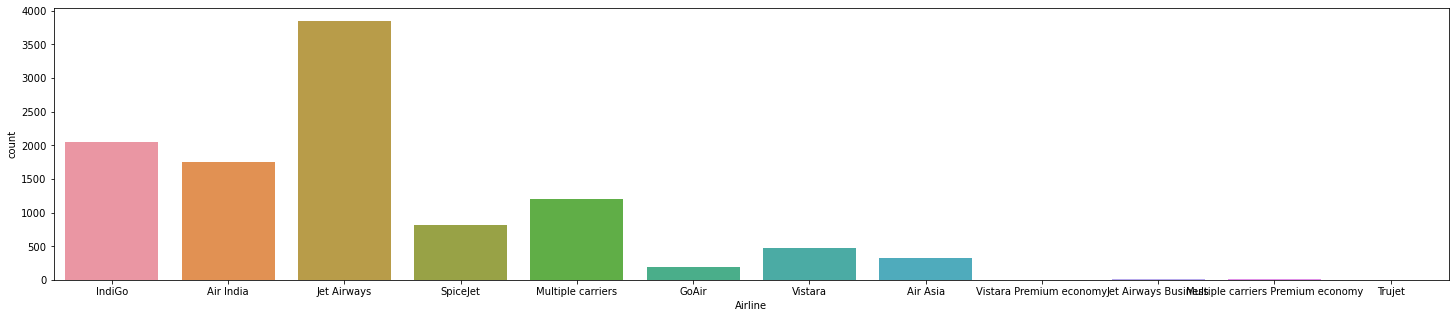

In [21]:
countplt,ax=plt.subplots(figsize=(25,5))
ax=sns.countplot(x="Airline", data=Flight_price_nominal)
print(Flight_price_nominal["Airline"].value_counts())

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


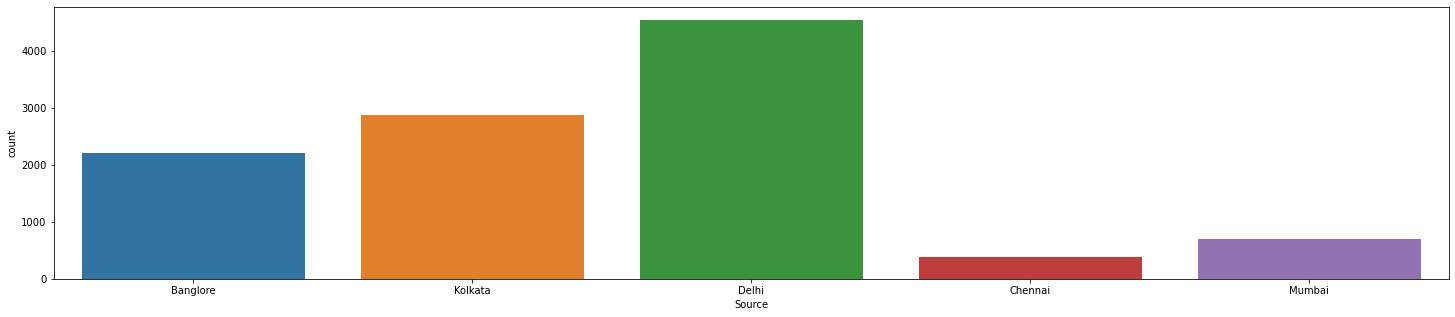

In [22]:
countplt,ax=plt.subplots(figsize=(25,5))
ax=sns.countplot(x="Source", data=Flight_price_nominal)
print(Flight_price_nominal["Source"].value_counts())

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


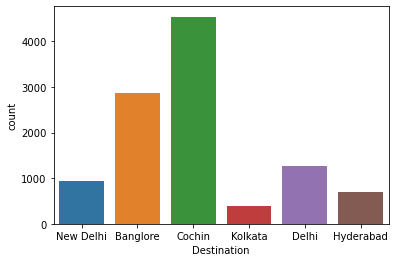

In [23]:
ax=sns.countplot(x="Destination", data=Flight_price_nominal)
print(Flight_price_nominal["Destination"].value_counts())

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


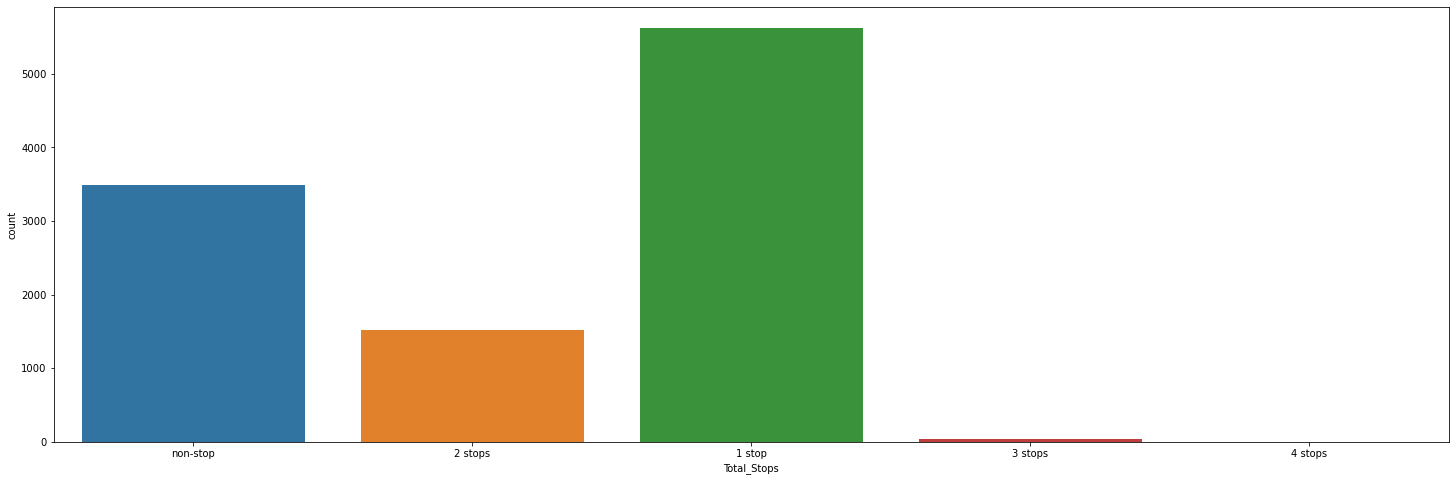

In [24]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Total_Stops", data=Flight_price_nominal)
print(Flight_price_nominal["Total_Stops"].value_counts())

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


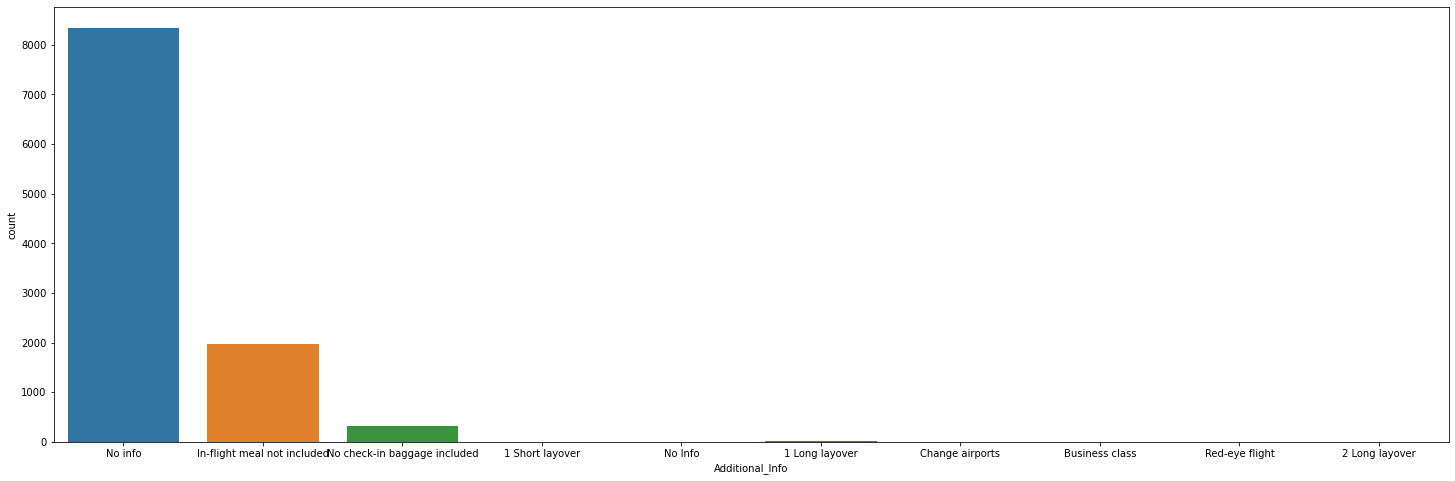

In [25]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Additional_Info", data=Flight_price_nominal)
print(Flight_price_nominal["Additional_Info"].value_counts())

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: Date_of_Journey_date, dtype: int64


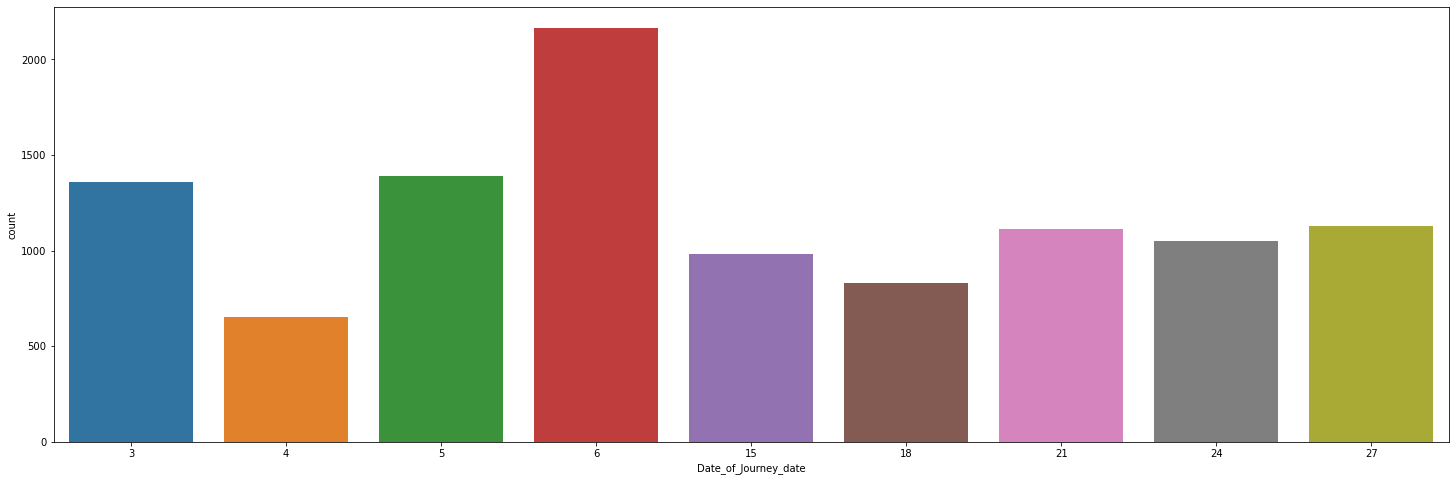

In [26]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Date_of_Journey_date", data=Flight_price_nominal)
print(Flight_price_nominal["Date_of_Journey_date"].value_counts())

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Date_of_Journey_month, dtype: int64


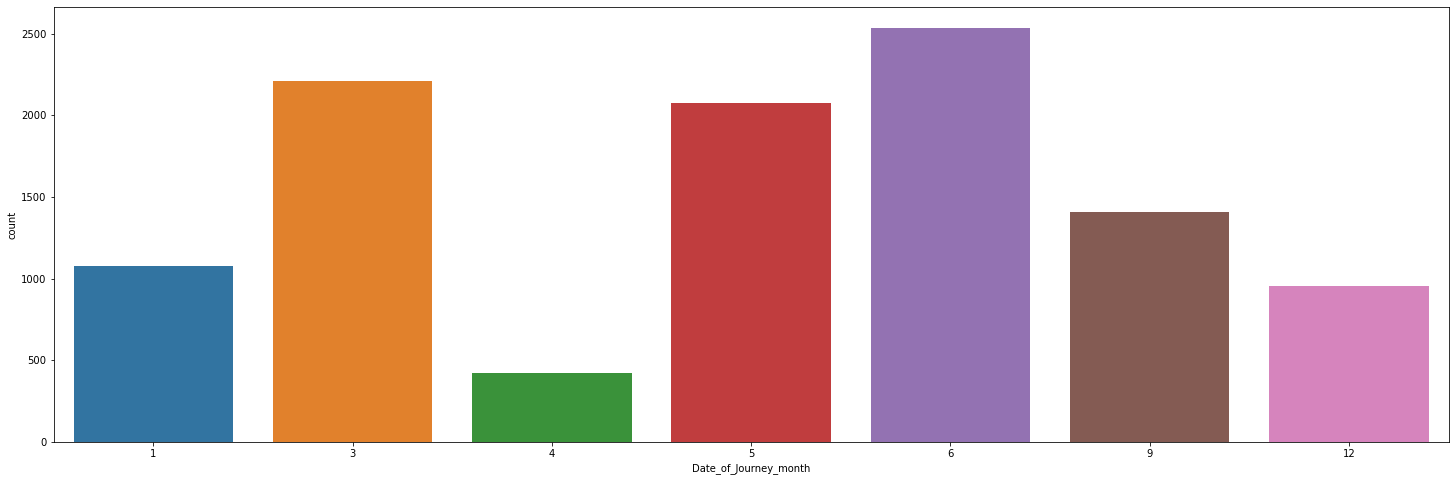

In [27]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Date_of_Journey_month", data=Flight_price_nominal)
print(Flight_price_nominal["Date_of_Journey_month"].value_counts())

2019    10683
Name: Date_of_Journey_year, dtype: int64


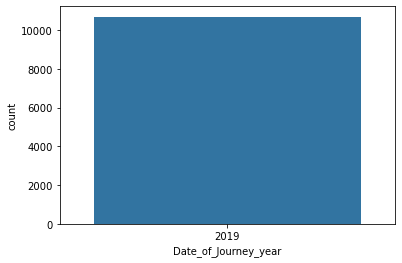

In [28]:
ax=sns.countplot(x="Date_of_Journey_year", data=Flight_price_nominal)
print(Flight_price_nominal["Date_of_Journey_year"].value_counts())

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_Time_hour, dtype: int64


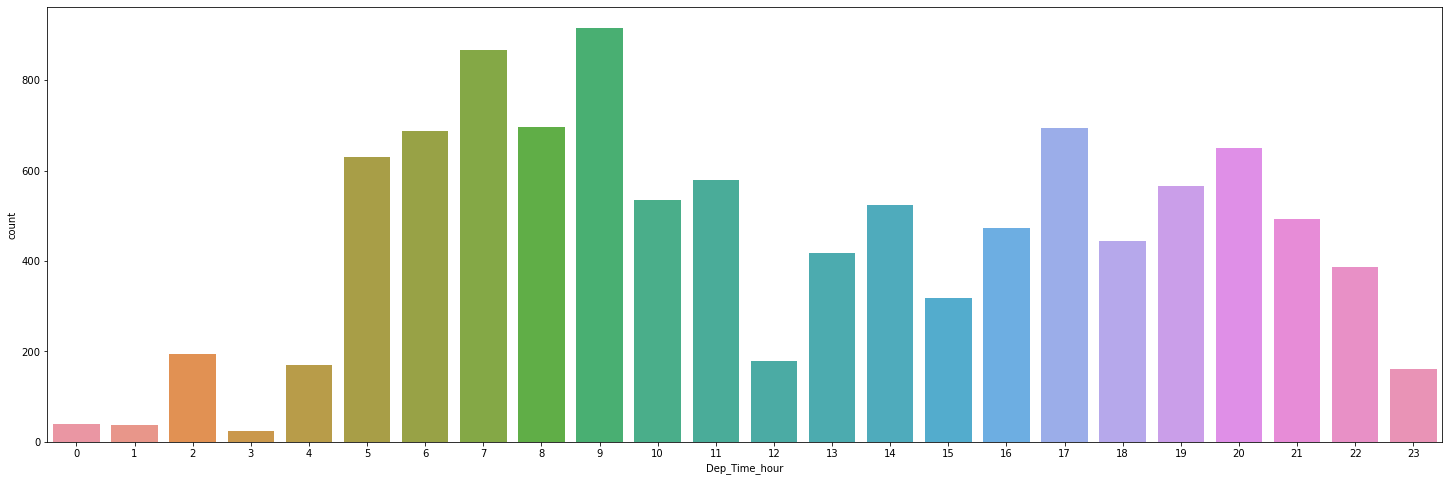

In [29]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Dep_Time_hour", data=Flight_price_nominal)
print(Flight_price_nominal["Dep_Time_hour"].value_counts())

0     2062
30    1215
55    1058
10     890
45     876
5      773
15     692
25     691
20     666
35     665
50     591
40     504
Name: Dep_Time_minute, dtype: int64


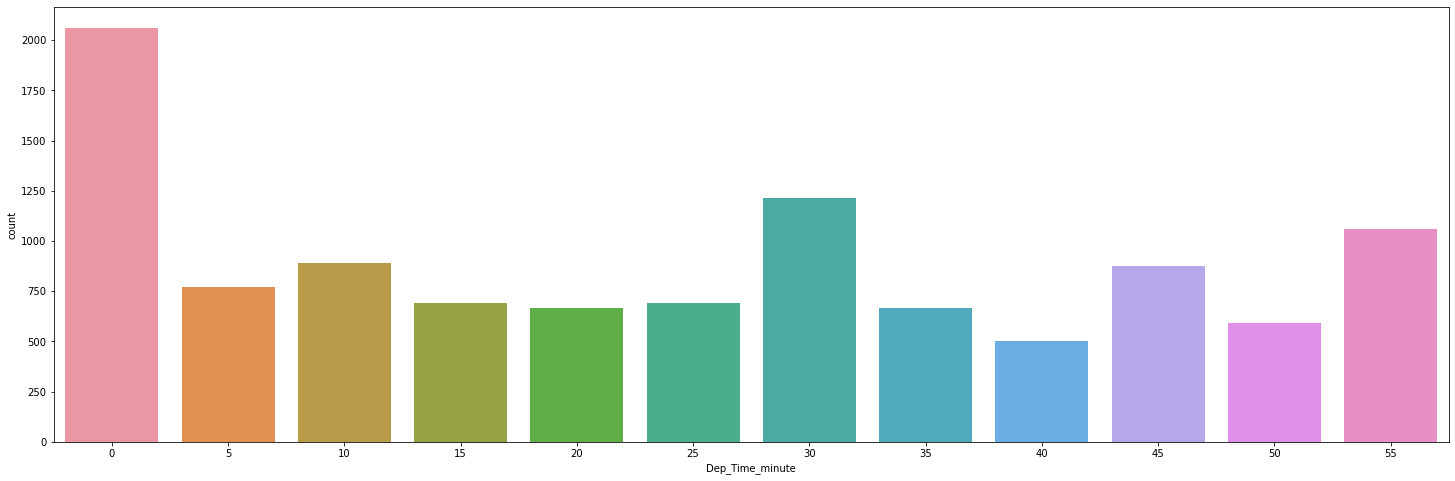

In [30]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Dep_Time_minute", data=Flight_price_nominal)
print(Flight_price_nominal["Dep_Time_minute"].value_counts())

11    6353
10     621
7      588
13     465
2      456
28     429
25     409
22     403
16     372
19     305
4      236
23      13
29      11
8        8
26       5
20       4
3        2
5        2
17       1
Name: Arrival_Time_date, dtype: int64


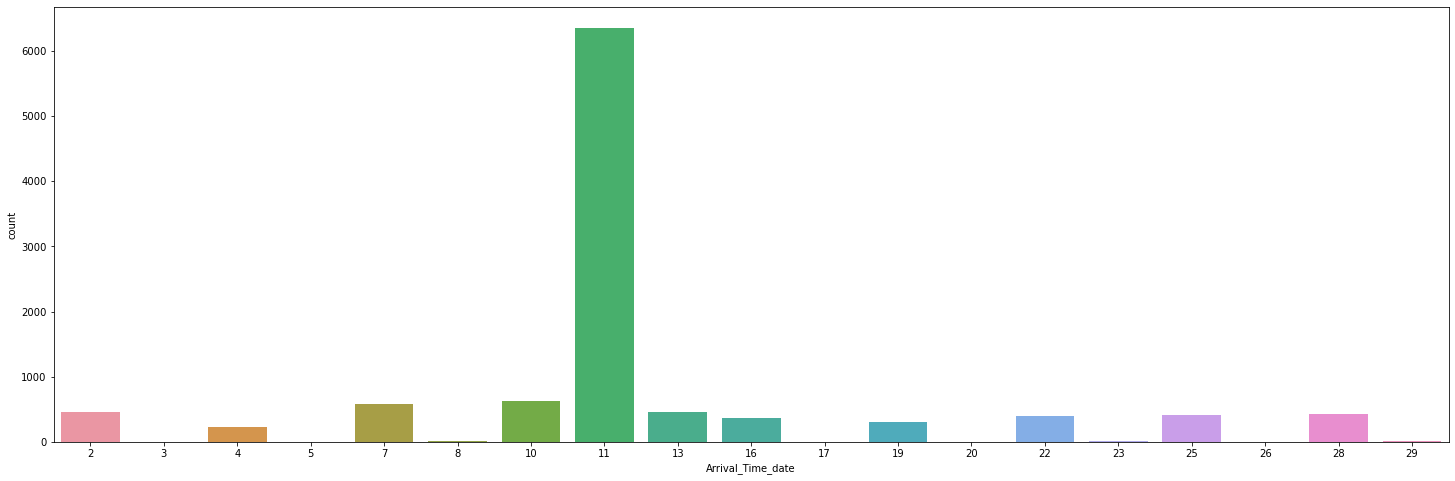

In [31]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Arrival_Time_date", data=Flight_price_nominal)
print(Flight_price_nominal["Arrival_Time_date"].value_counts())

11    6348
5     1552
6     1423
3     1102
4      258
Name: Arrival_Time_month, dtype: int64


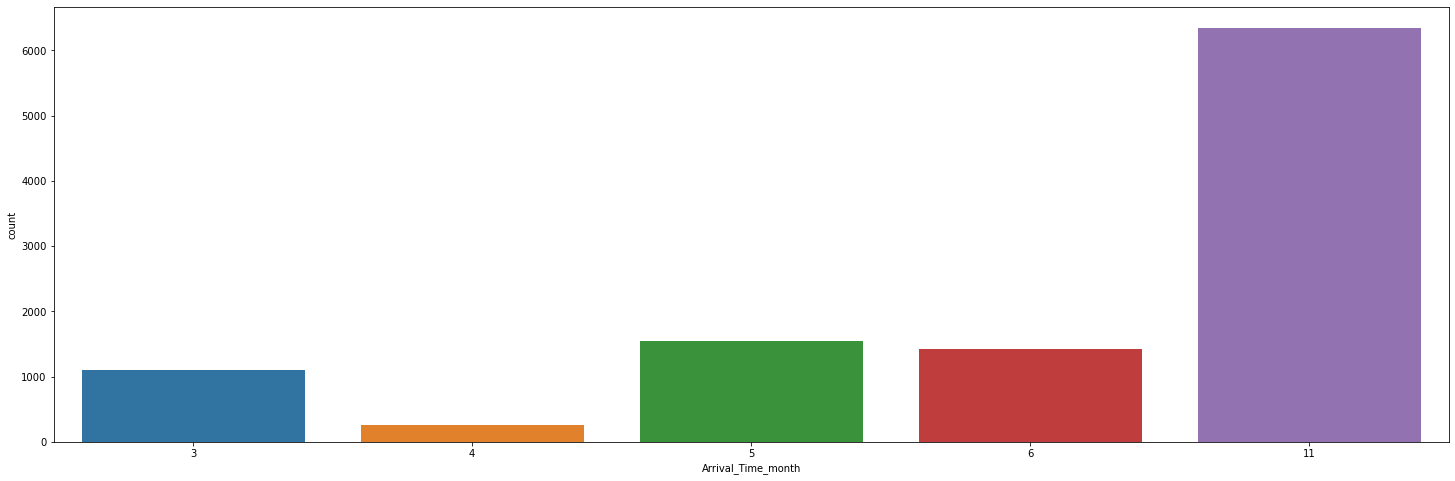

In [32]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Arrival_Time_month", data=Flight_price_nominal)
print(Flight_price_nominal["Arrival_Time_month"].value_counts())

2021    10683
Name: Arrival_Time_year, dtype: int64


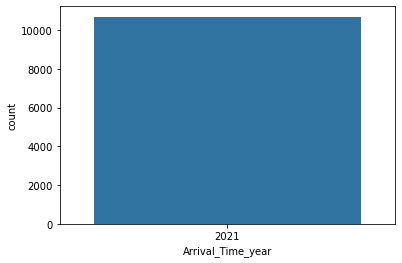

In [33]:
ax=sns.countplot(x="Arrival_Time_year", data=Flight_price_nominal)
print(Flight_price_nominal["Arrival_Time_year"].value_counts())

19    1626
12     897
4      838
21     703
22     647
1      529
18     514
9      490
23     485
10     476
8      471
7      417
20     377
16     370
0      322
13     308
11     298
14     295
17     191
15     182
2       79
5       69
6       52
3       47
Name: Arrival_Time_hour, dtype: int64


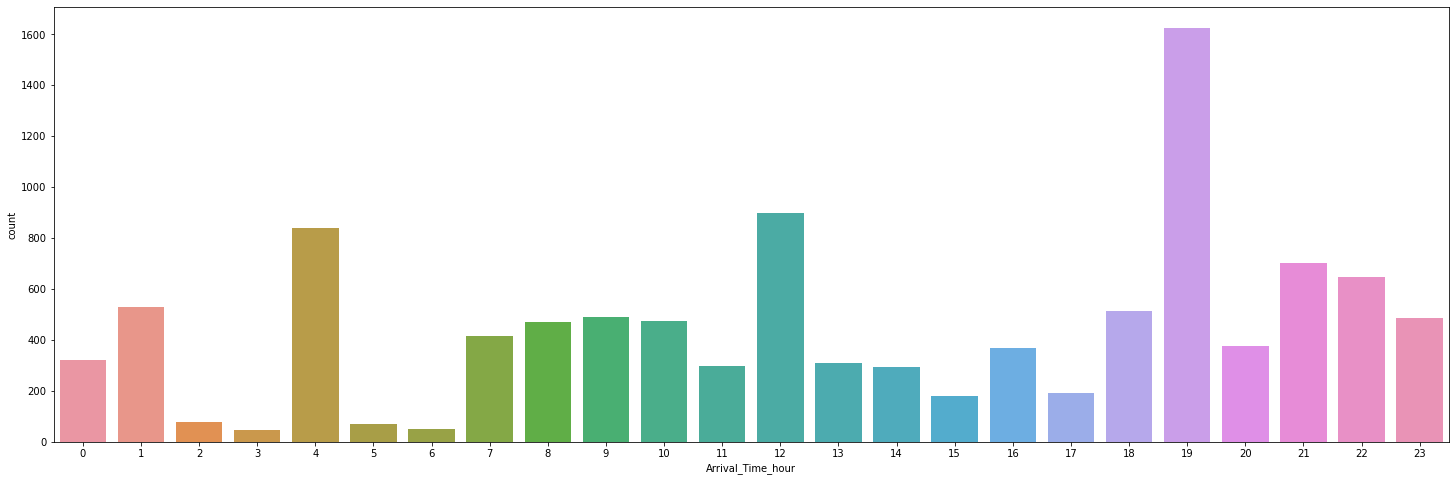

In [34]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Arrival_Time_hour", data=Flight_price_nominal)
print(Flight_price_nominal["Arrival_Time_hour"].value_counts())

0     1447
25    1302
15    1286
35    1111
20     902
30     832
50     750
45     697
5      660
40     629
10     577
55     490
Name: Arrival_Time_minute, dtype: int64


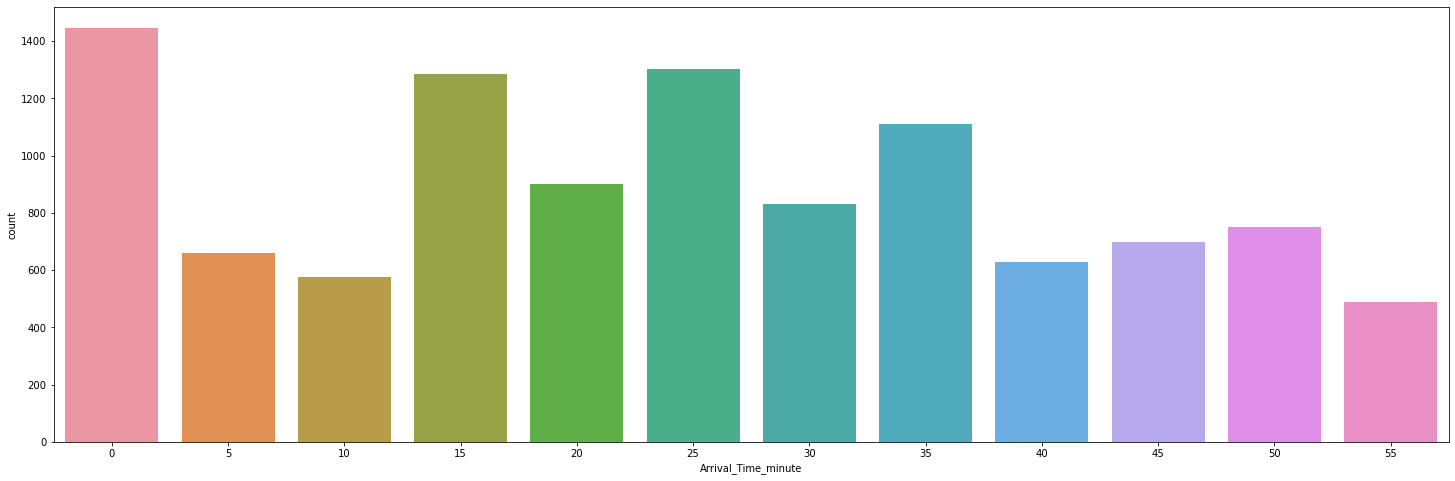

In [35]:
countplt,ax=plt.subplots(figsize=(25,8))
ax=sns.countplot(x="Arrival_Time_minute", data=Flight_price_nominal)
print(Flight_price_nominal["Arrival_Time_minute"].value_counts())

### Label Encoding String Data

In [36]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [37]:
for i in Flight_price.columns:
    if Flight_price[i].dtypes=="object":
        Flight_price[i]=enc.fit_transform(Flight_price[i].values.reshape(-1,1))

In [38]:
Flight_price

Airline  Source  Destination  Route  Duration  Total_Stops  \
0          3.0     0.0          5.0   18.0     240.0          4.0   
1          1.0     3.0          0.0   84.0     336.0          1.0   
2          4.0     2.0          1.0  118.0     106.0          1.0   
3          3.0     3.0          0.0   91.0     311.0          0.0   
4          3.0     0.0          5.0   29.0     303.0          0.0   
...        ...     ...          ...    ...       ...          ...   
10678      0.0     3.0          0.0   64.0     236.0          4.0   
10679      1.0     3.0          0.0   64.0     237.0          4.0   
10680      4.0     0.0          2.0   18.0     280.0          4.0   
10681     10.0     0.0          5.0   18.0     238.0          4.0   
10682      1.0     2.0          1.0  108.0     347.0          1.0   

       Additional_Info  Price  Date_of_Journey_date  Date_of_Journey_month  \
0                  8.0   3897                    24                      3   
1                  8.0   7662                     5                      1   
2                  8.0  13882                     6                      9   
3                  8.0   6218                     5                     12   
4                  8.0  13302                     3                      1   
...                ...    ...                   ...                    ...   
10678              8.0   4107                     4                      9   
10679              8.0   4145                    27                      4   
10680              8.0   7229                    27                      4   
10681              8.0  12648                     3                      1   
10682              8.0  11753                     5                      9   

       Date_of_Journey_year  Dep_Time_hour  Dep_Time_minute  \
0                      2019             22               20   
1                      2019              5               50   
2                      2019              9               25   
3                      2019             18                5   
4                      2019             16               50   
...                     ...            ...              ...   
10678                  2019             19               55   
10679                  2019             20               45   
10680                  2019              8               20   
10681                  2019             11               30   
10682                  2019             10               55   

       Arrival_Time_date  Arrival_Time_month  Arrival_Time_year  \
0                     22                   3               2021   
1                     11                  11               2021   
2                     10                   6               2021   
3                     11                  11               2021   
4                     11                  11               2021   
...                  ...                 ...                ...   
10678                 11                  11               2021   
10679                 11                  11               2021   
10680                 11                  11               2021   
10681                 11                  11               2021   
10682                 11                  11               2021   

       Arrival_Time_hour  Arrival_Time_minute  
0                      1                   10  
1                     13                   15  
2                      4                   25  
3                     23                   30  
4                     21                   35  
...                  ...                  ...  
10678                 22                   25  
10679                 23                   20  
10680                 11                   20  
10681                 14                   10  
10682                 19                   15  

[10683 rows x 18 columns]

### Checking the distribution of the continous value or the float type columns 

In [39]:
Flight_price_continuous=Flight_price[["Route","Duration","Price"]].copy()

In [40]:
Flight_price_continuous.columns

Index(['Route', 'Duration', 'Price'], dtype='object')

<AxesSubplot:xlabel='Route', ylabel='Density'>

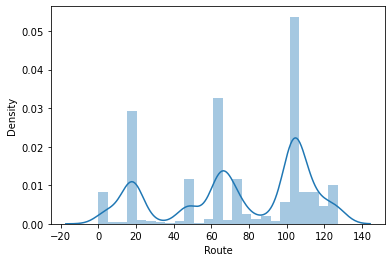

In [41]:
sns.distplot(Flight_price_continuous['Route'],kde=True)

Given plot is multimodal with several peaks and with minimum and maximum value -20 and 140 respectively.

<AxesSubplot:xlabel='Duration', ylabel='Density'>

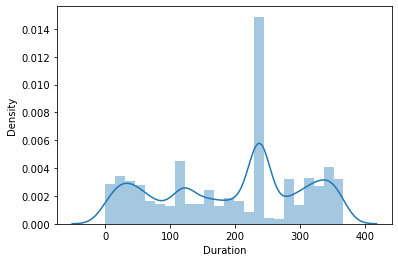

In [42]:
sns.distplot(Flight_price_continuous['Duration'],kde=True)

Given plot is multimodal with minimum value 0 and maximum value 400.

<AxesSubplot:xlabel='Price', ylabel='Density'>

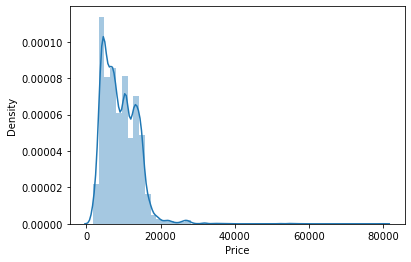

In [43]:
sns.distplot(Flight_price_continuous['Price'],kde=True)

Given plot is positively skewed with minimum value 0 and maximum value 80000.

## Outliers Check

<AxesSubplot:>

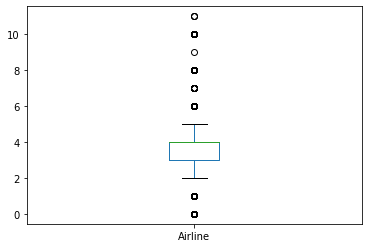

In [44]:
Flight_price['Airline'].plot.box()

<AxesSubplot:>

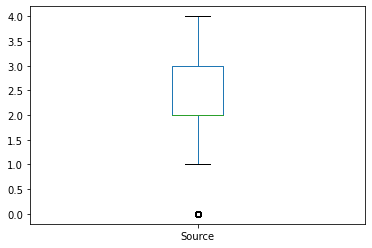

In [45]:
Flight_price['Source'].plot.box()

<AxesSubplot:>

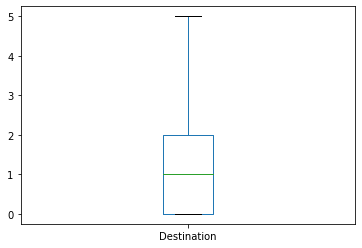

In [46]:
Flight_price['Destination'].plot.box()

<AxesSubplot:>

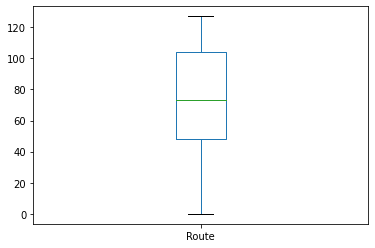

In [47]:
Flight_price['Route'].plot.box()

<AxesSubplot:>

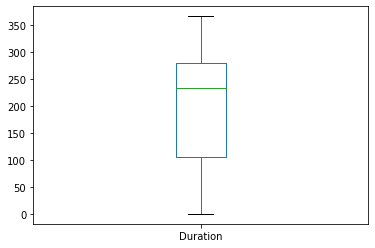

In [48]:
Flight_price['Duration'].plot.box()

<AxesSubplot:>

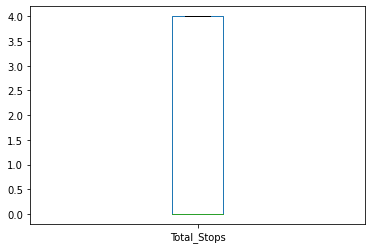

In [49]:
Flight_price['Total_Stops'].plot.box()

<AxesSubplot:>

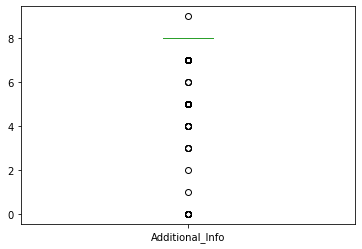

In [50]:
Flight_price['Additional_Info'].plot.box()

<AxesSubplot:>

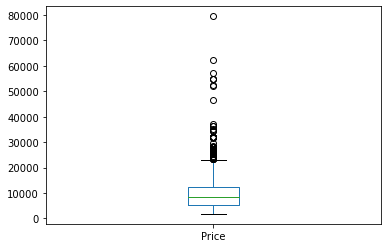

In [51]:
Flight_price['Price'].plot.box()

<AxesSubplot:>

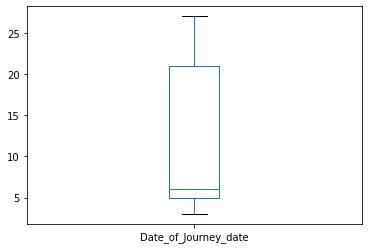

In [52]:
Flight_price['Date_of_Journey_date'].plot.box()

<AxesSubplot:>

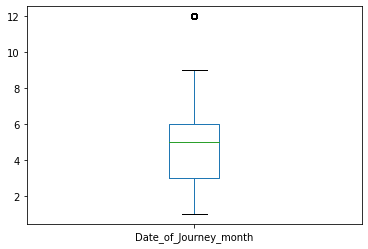

In [53]:
Flight_price['Date_of_Journey_month'].plot.box()

<AxesSubplot:>

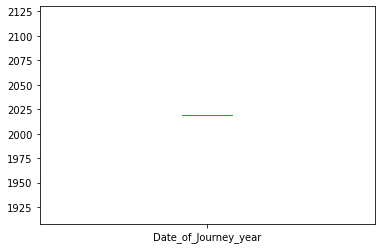

In [54]:
Flight_price['Date_of_Journey_year'].plot.box()

<AxesSubplot:>

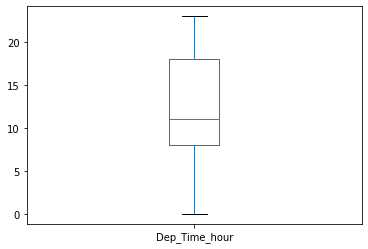

In [55]:
Flight_price['Dep_Time_hour'].plot.box()

<AxesSubplot:>

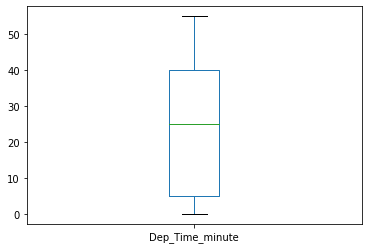

In [56]:
Flight_price['Dep_Time_minute'].plot.box()

<AxesSubplot:>

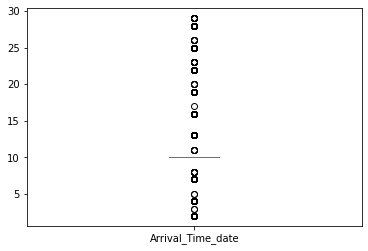

In [57]:
Flight_price['Arrival_Time_date'].plot.box()

<AxesSubplot:>

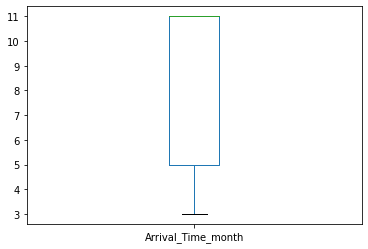

In [58]:
Flight_price['Arrival_Time_month'].plot.box()

<AxesSubplot:>

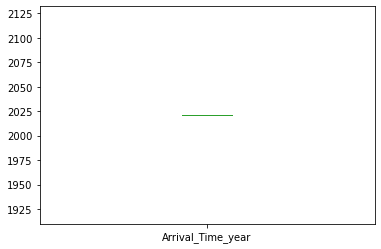

In [59]:
Flight_price['Arrival_Time_year'].plot.box()

<AxesSubplot:>

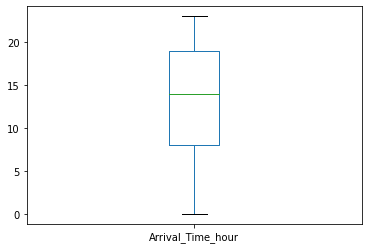

In [60]:
Flight_price['Arrival_Time_hour'].plot.box()

<AxesSubplot:>

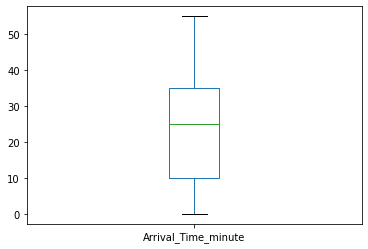

In [61]:
Flight_price['Arrival_Time_minute'].plot.box()

From the above boxplots columns Airline, Source, Additional_Info,Price,Date_of_Journey_month,Arrival_Time_date have outliers.

## Bivariate Analysis 

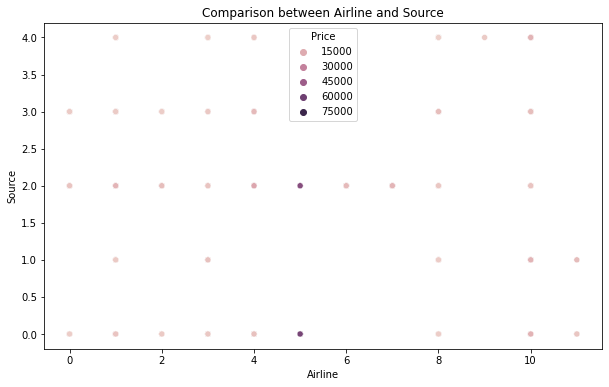

In [62]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Airline and Source')
sns.scatterplot(Flight_price['Airline'], Flight_price['Source'], hue=Flight_price["Price"]);

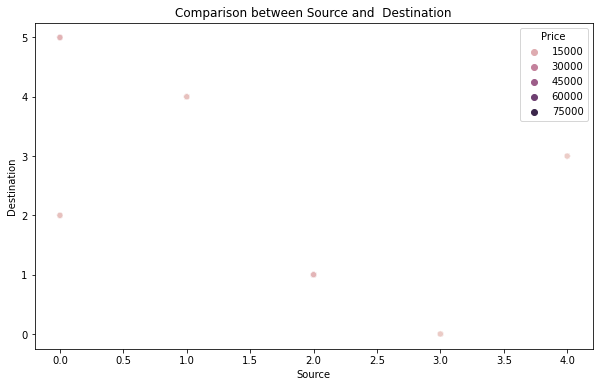

In [63]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Source and  Destination')
sns.scatterplot(Flight_price['Source'], Flight_price['Destination'], hue=Flight_price["Price"]);

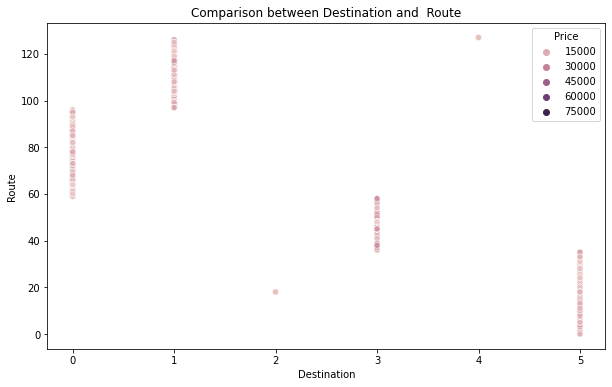

In [64]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Destination and  Route')
sns.scatterplot(Flight_price['Destination'], Flight_price['Route'], hue=Flight_price["Price"]);

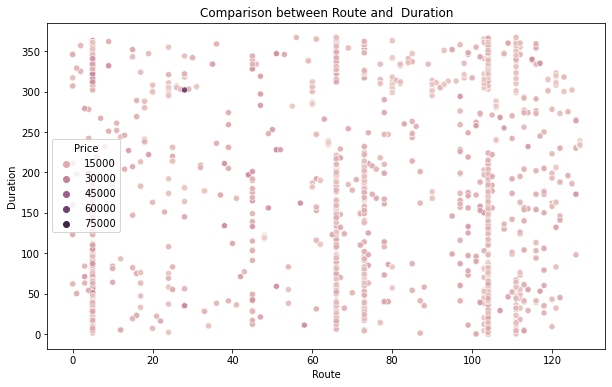

In [65]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Route and  Duration')
sns.scatterplot(Flight_price['Route'], Flight_price['Duration'], hue=Flight_price["Price"]);

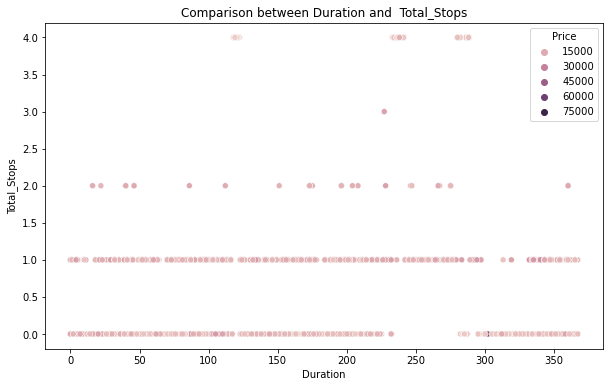

In [66]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Duration and  Total_Stops')
sns.scatterplot(Flight_price['Duration'], Flight_price['Total_Stops'], hue=Flight_price["Price"]);

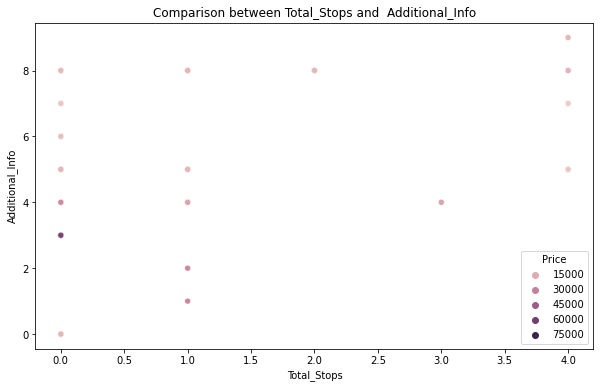

In [67]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Total_Stops and  Additional_Info')
sns.scatterplot(Flight_price['Total_Stops'], Flight_price['Additional_Info'], hue=Flight_price["Price"]);

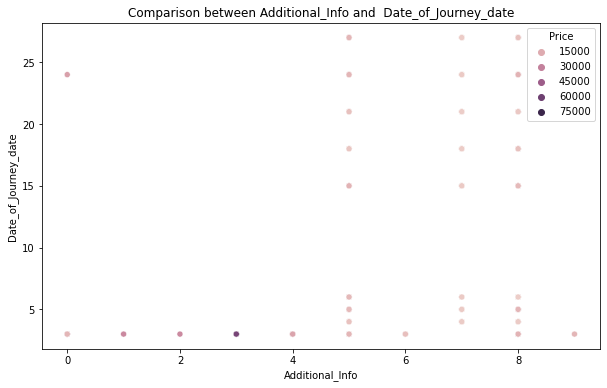

In [68]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Additional_Info and  Date_of_Journey_date')
sns.scatterplot(Flight_price['Additional_Info'], Flight_price['Date_of_Journey_date'], hue=Flight_price["Price"]);

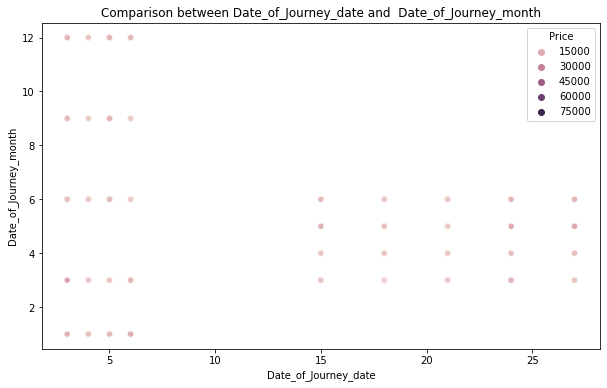

In [69]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Date_of_Journey_date and  Date_of_Journey_month')
sns.scatterplot(Flight_price['Date_of_Journey_date'], Flight_price['Date_of_Journey_month'], hue=Flight_price["Price"]);

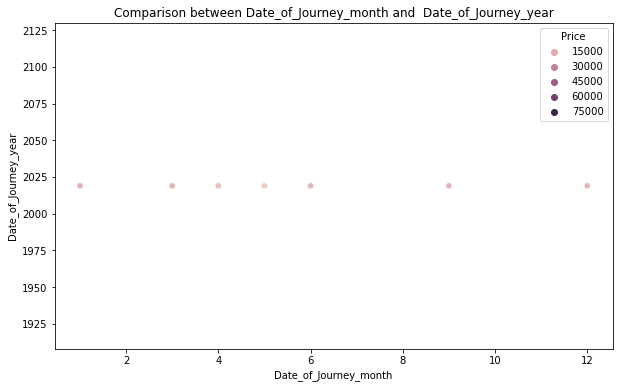

In [70]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Date_of_Journey_month and  Date_of_Journey_year')
sns.scatterplot(Flight_price['Date_of_Journey_month'], Flight_price['Date_of_Journey_year'], hue=Flight_price["Price"]);

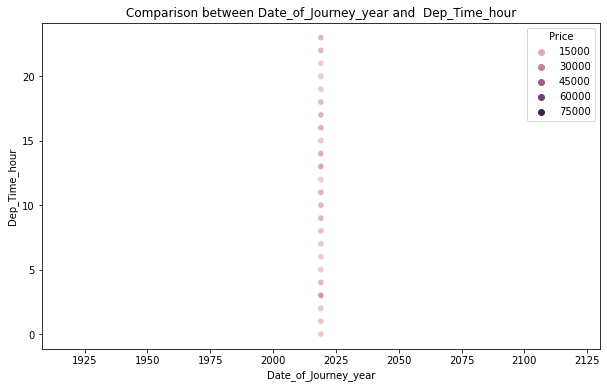

In [71]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Date_of_Journey_year and  Dep_Time_hour')
sns.scatterplot(Flight_price['Date_of_Journey_year'], Flight_price['Dep_Time_hour'], hue=Flight_price["Price"]);

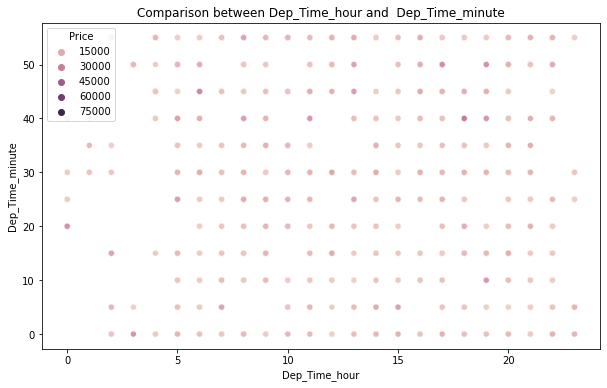

In [72]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Dep_Time_hour and  Dep_Time_minute')
sns.scatterplot(Flight_price['Dep_Time_hour'], Flight_price['Dep_Time_minute'], hue=Flight_price["Price"]);

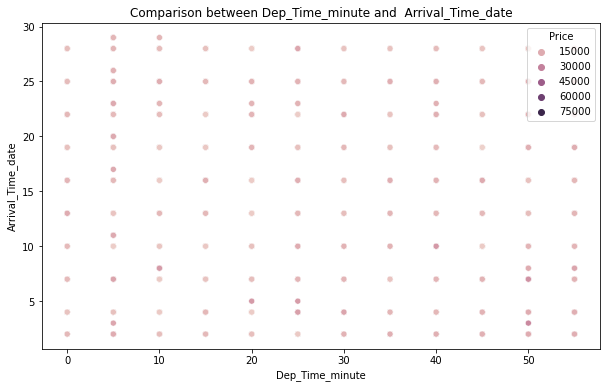

In [73]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Dep_Time_minute and  Arrival_Time_date')
sns.scatterplot(Flight_price['Dep_Time_minute'], Flight_price['Arrival_Time_date'], hue=Flight_price["Price"]);

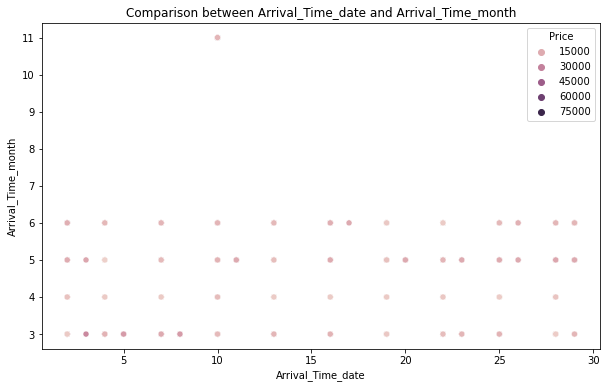

In [74]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Arrival_Time_date and Arrival_Time_month')
sns.scatterplot(Flight_price['Arrival_Time_date'], Flight_price['Arrival_Time_month'], hue=Flight_price["Price"]);

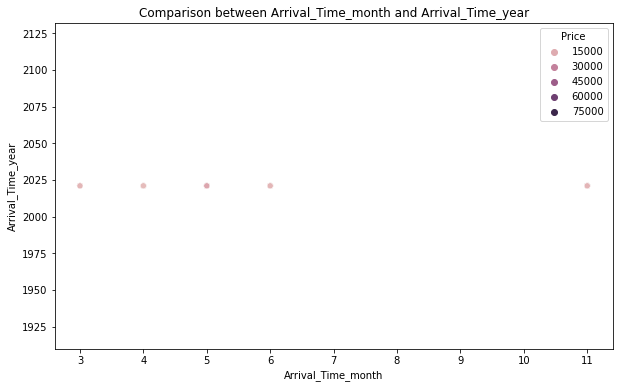

In [75]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Arrival_Time_month and Arrival_Time_year')
sns.scatterplot(Flight_price['Arrival_Time_month'], Flight_price['Arrival_Time_year'], hue=Flight_price["Price"]);

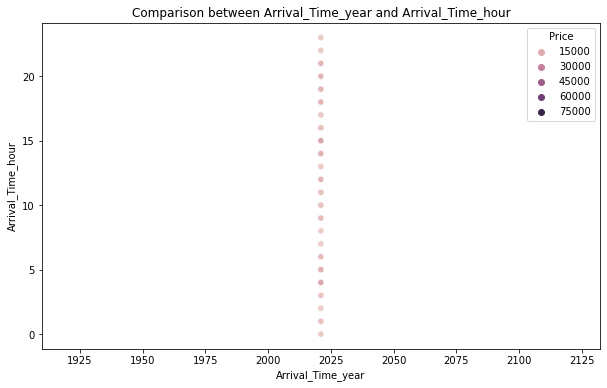

In [76]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Arrival_Time_year and Arrival_Time_hour')
sns.scatterplot(Flight_price['Arrival_Time_year'], Flight_price['Arrival_Time_hour'], hue=Flight_price["Price"]);

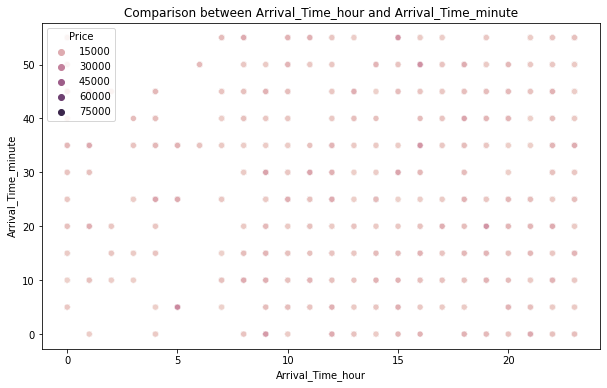

In [77]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Arrival_Time_hour and Arrival_Time_minute')
sns.scatterplot(Flight_price['Arrival_Time_hour'], Flight_price['Arrival_Time_minute'], hue=Flight_price["Price"]);

From the above scatterplots we can say that none of the columns have significant correlation between them.

In [194]:
Flight_price.describe(percentiles=[0.20,0.25,0.40,0.50,0.60,0.75,0.80])

Airline        Source   Destination         Route      Duration  \
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.000000   
mean       3.965927      1.952261      1.436113     74.822896    194.069269   
std        2.352155      1.177221      1.474782     36.728405    108.620556   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
20%        2.000000      0.000000      0.000000     26.000000     70.000000   
25%        3.000000      2.000000      0.000000     48.000000    106.000000   
40%        3.000000      2.000000      1.000000     66.000000    168.000000   
50%        4.000000      2.000000      1.000000     73.000000    233.000000   
60%        4.000000      2.000000      1.000000    104.000000    239.000000   
75%        4.000000      3.000000      2.000000    104.000000    280.000000   
80%        6.000000      3.000000      2.000000    104.000000    307.000000   
max       11.000000      4.000000      5.000000    127.000000    367.000000   

        Total_Stops  Additional_Info         Price  Date_of_Journey_date  \
count  10683.000000     10683.000000  10683.000000          10683.000000   
mean       1.458111         7.393054   9087.064121             12.682205   
std        1.806290         1.214211   4611.359167              8.803701   
min        0.000000         0.000000   1759.000000              3.000000   
20%        0.000000         7.000000   4823.000000              5.000000   
25%        0.000000         8.000000   5277.000000              5.000000   
40%        0.000000         8.000000   7189.000000              6.000000   
50%        0.000000         8.000000   8372.000000              6.000000   
60%        1.000000         8.000000  10203.000000             15.000000   
75%        4.000000         8.000000  12373.000000             21.000000   
80%        4.000000         8.000000  13042.000000             24.000000   
max        4.000000         9.000000  79512.000000             27.000000   

       Date_of_Journey_month  Date_of_Journey_year  Dep_Time_hour  \
count           10683.000000               10683.0   10683.000000   
mean                5.534775                2019.0      12.490686   
std                 2.987489                   0.0       5.748650   
min                 1.000000                2019.0       0.000000   
20%                 3.000000                2019.0       7.000000   
25%                 3.000000                2019.0       8.000000   
40%                 5.000000                2019.0      10.000000   
50%                 5.000000                2019.0      11.000000   
60%                 6.000000                2019.0      14.000000   
75%                 6.000000                2019.0      18.000000   
80%                 9.000000                2019.0      19.000000   
max                12.000000                2019.0      23.000000   

       Dep_Time_minute  Arrival_Time_date  Arrival_Time_month  \
count     10683.000000       10683.000000        10683.000000   
mean         24.411214          12.345315            8.468033   
std          18.767980           5.557946            3.152045   
min           0.000000           2.000000            3.000000   
20%           5.000000          11.000000            5.000000   
25%           5.000000          11.000000            5.000000   
40%          15.000000          11.000000            6.000000   
50%          25.000000          11.000000           11.000000   
60%          30.000000          11.000000           11.000000   
75%          40.000000          11.000000           11.000000   
80%          45.000000          13.000000           11.000000   
max          55.000000          29.000000           11.000000   

       Arrival_Time_year  Arrival_Time_hour  Arrival_Time_minute  
count            10683.0       10683.000000         10683.000000  
mean              2021.0          13.348778            24.690630  
std                  0.0           6.859125       

Mean is higher than median in Destination,Route,Total_Stops,Price,Date_of_Journey_date,Date_of_Journey_month,Dep_Time_hour,Arrival_Time_date, 
so the data is positively skewed in these columns.

Small gap can be found between 75 percentile and max in Source,Destination,Route,Duration,Date_of_Journey_date,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_date,
so some outliers are present in these columns.

Large gap can be found between 75 percentile and max in Airline and Price more number of outliers are present in these columns.

## multivariate analysis

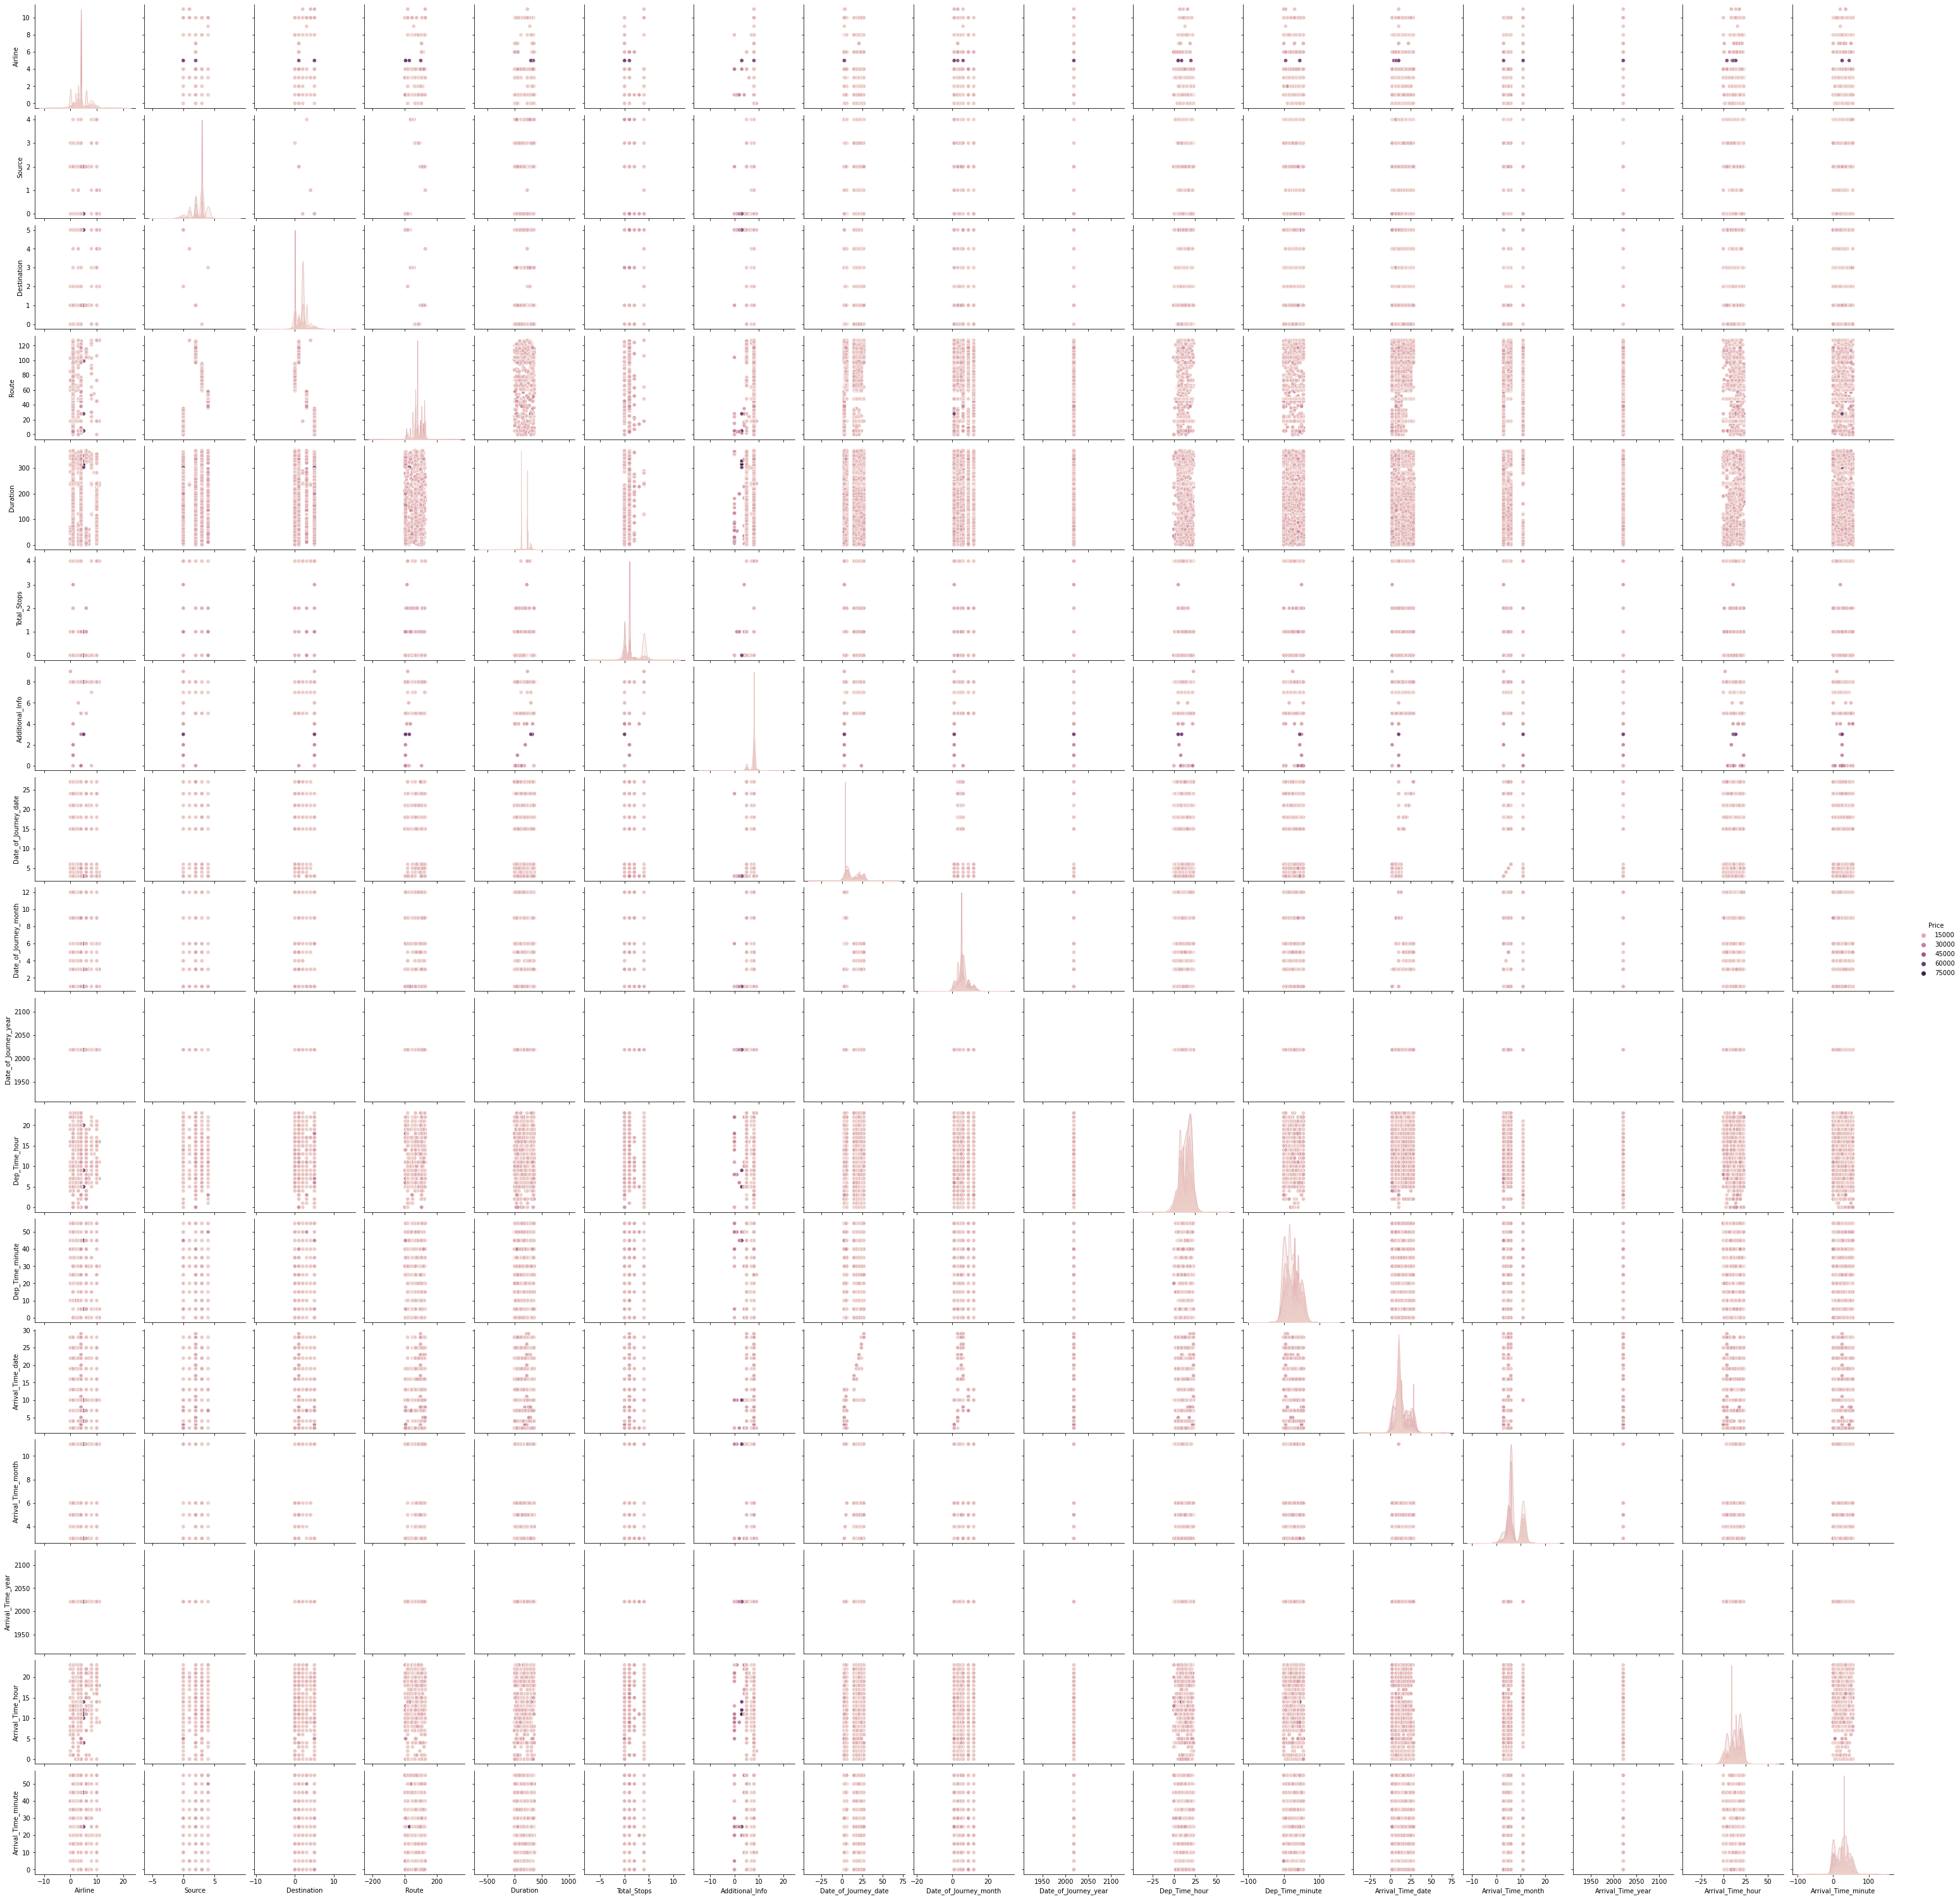

In [79]:
sns.pairplot(Flight_price,hue="Price")  

In [80]:
cor=Flight_price.corr()
cor

Airline    Source  Destination     Route  Duration  \
Airline                1.000000 -0.013401     0.018479  0.025118  0.027917   
Source                -0.013401  1.000000    -0.592574  0.403403 -0.192009   
Destination            0.018479 -0.592574     1.000000 -0.461183  0.022037   
Route                  0.025118  0.403403    -0.461183  1.000000 -0.062097   
Duration               0.027917 -0.192009     0.022037 -0.062097  1.000000   
Total_Stops            0.036064 -0.225601     0.337883 -0.437783  0.175207   
Additional_Info       -0.060802 -0.022107     0.026806  0.035188  0.080151   
Price                 -0.039520  0.015998    -0.071112  0.164118 -0.144270   
Date_of_Journey_date   0.031218  0.007560    -0.052076  0.096530  0.024767   
Date_of_Journey_month -0.007918  0.063052    -0.105039  0.042204 -0.038864   
Date_of_Journey_year        NaN       NaN          NaN       NaN       NaN   
Dep_Time_hour         -0.035194  0.059044    -0.072979 -0.075044  0.041523   
Dep_Time_minute       -0.060044 -0.056991     0.127892 -0.067984  0.030845   
Arrival_Time_date     -0.040687  0.056587    -0.113532  0.131185 -0.065485   
Arrival_Time_month     0.128077 -0.090100     0.126962 -0.107297  0.213444   
Arrival_Time_year           NaN       NaN          NaN       NaN       NaN   
Arrival_Time_hour     -0.007491  0.025632    -0.039710  0.013851  0.024527   
Arrival_Time_minute   -0.071089  0.021040     0.017196 -0.173345  0.059970   

                       Total_Stops  Additional_Info     Price  \
Airline                   0.036064        -0.060802 -0.039520   
Source                   -0.225601        -0.022107  0.015998   
Destination               0.337883         0.026806 -0.071112   
Route                    -0.437783         0.035188  0.164118   
Duration                  0.175207         0.080151 -0.144270   
Total_Stops               1.000000         0.164009 -0.571174   
Additional_Info           0.164009         1.000000 -0.065478   
Price                    -0.571174        -0.065478  1.000000   
Date_of_Journey_date      0.043907        -0.019456 -0.165412   
Date_of_Journey_month    -0.056524        -0.009098  0.010700   
Date_of_Journey_year           NaN              NaN       NaN   
Dep_Time_hour             0.039268        -0.051010  0.006819   
Dep_Time_minute           0.048813        -0.019339 -0.024492   
Arrival_Time_date        -0.112557        -0.081490  0.041793   
Arrival_Time_month        0.346237         0.148761 -0.351338   
Arrival_Time_year              NaN              NaN       NaN   
Arrival_Time_hour        -0.095598         0.026173  0.024264   
Arrival_Time_minute       0.175973         0.041311 -0.086155   

                       Date_of_Journey_date  Date_of_Journey_month  \
Airline                            0.031218              -0.007918   
Source                             0.007560               0.063052   
Destination                       -0.052076              -0.105039   
Route                              0.096530               0.042204   
Duration                           0.024767              -0.038864   
Total_Stops                        0.043907              -0.056524   
Additional_Info                   -0.019456              -0.009098   
Price                             -0.165412               0.010700   
Date_of_Journey_date               1.000000              -0.264899   
Date_of_Journey_month             -0.264899               1.000000   
Date_of_Journey_year                    NaN                    NaN   
Dep_Time_hour                     -0.002251               0.028180   
Dep_Time_minute                   -0.016521               0.002152   
Arrival_Time_date                  0.541543               0.038215   
Arrival_Time_month                 0.029475              -0.016014   
Arrival_Time_year                       NaN                    NaN   
Arrival_Time_hour                 -0.002124              -0.004338   
Arrival_Time_minute               -0.021424  

<AxesSubplot:>

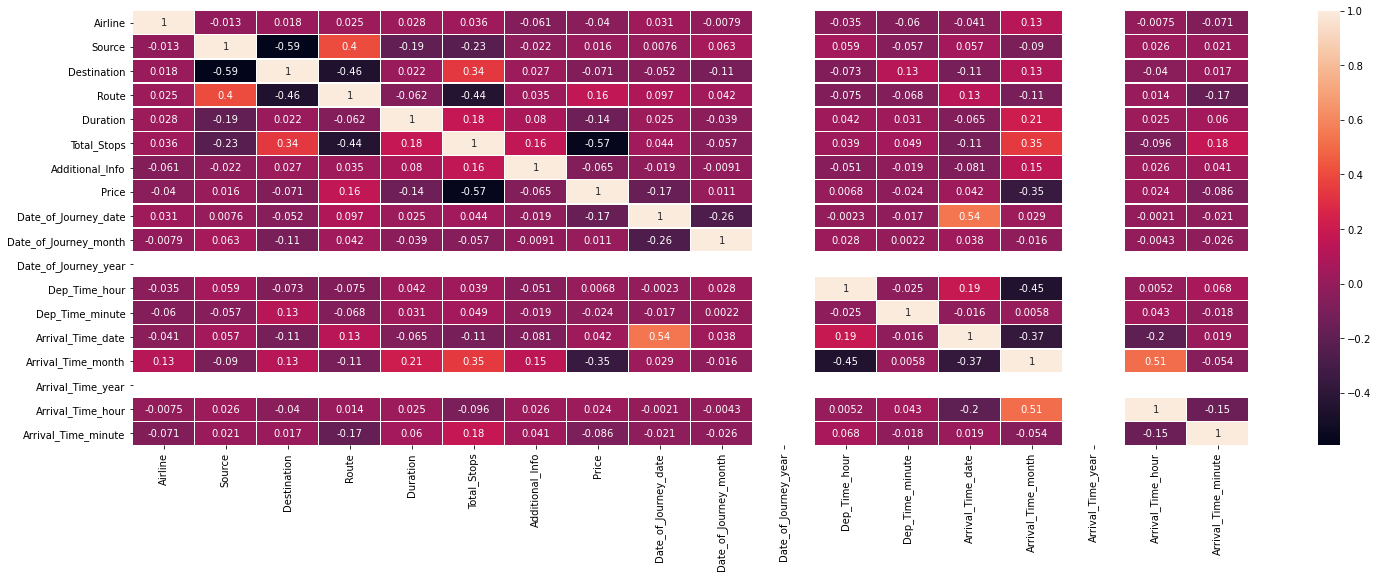

In [81]:
import matplotlib.pyplot as plt  # Sample figsize in inches
fig, ax = plt.subplots(figsize=(25,8))        
sns.heatmap(cor, annot=True, linewidths=.5, ax=ax)

From the above correlation heatmap we can see that 

Columns having positive correlation are:

Date_of_Journey_date and Arrival_Time_date with value=0.54

Arrival_Time_month and Arrival_Time_hour with value=0.51

Columns having negative correlation are:
    
Source and Destination with value=-0.59

Total_Stops and Price with value=-0.57



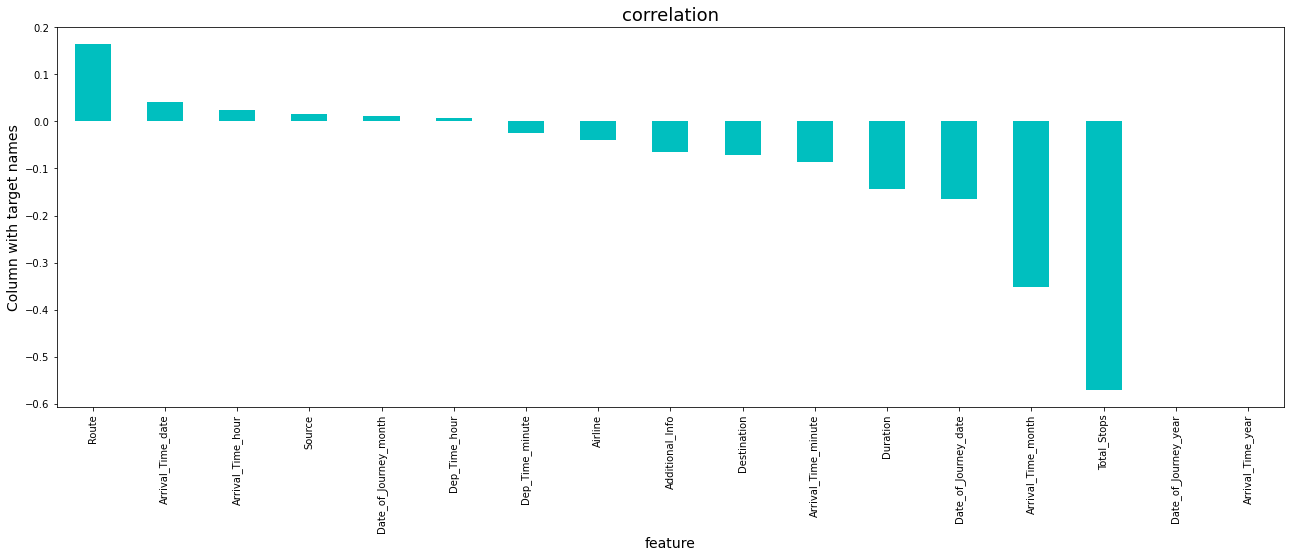

In [82]:
plt.figure(figsize=(22,7))
cor['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

## Considering the outlier removal

In [39]:
#removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(Flight_price))
z

array([[0.41067545, 1.65844074, 2.41666505, ...,        nan, 1.80042732,
        0.8900573 ],
       [1.26099927, 0.89005213, 0.97382594, ...,        nan, 0.0508512 ,
        0.58712363],
       [0.01448647, 0.04055451, 0.29572775, ...,        nan, 1.36303329,
        0.01874372],
       ...,
       [0.01448647, 1.65844074, 0.38237045, ...,        nan, 0.34244722,
        0.28418995],
       [2.56545795, 1.65844074, 2.41666505, ...,        nan, 0.09494681,
        0.8900573 ],
       [1.26099927, 0.04055451, 0.29572775, ...,        nan, 0.82393686,
        0.58712363]])

In [40]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7,

In [41]:
Flight_price_new=Flight_price[(z<3).all(axis=1)]

In [42]:
Flight_price_new

Empty DataFrame
Columns: [Airline, Source, Destination, Route, Duration, Total_Stops, Additional_Info, Price, Date_of_Journey_date, Date_of_Journey_month, Date_of_Journey_year, Dep_Time_hour, Dep_Time_minute, Arrival_Time_date, Arrival_Time_month, Arrival_Time_year, Arrival_Time_hour, Arrival_Time_minute]
Index: []

Sowe will use the original dataframe

## Skewness Checking and Removal

In [44]:
Flight_price.skew()

Airline                  0.731095
Source                  -0.424054
Destination              1.244169
Route                   -0.502066
Duration                -0.213427
Total_Stops              0.631681
Additional_Info         -1.779838
Price                    1.812552
Date_of_Journey_date     0.367373
Date_of_Journey_month    0.629540
Date_of_Journey_year     0.000000
Dep_Time_hour            0.113073
Dep_Time_minute          0.167029
Arrival_Time_date        1.237047
Arrival_Time_month      -0.556910
Arrival_Time_year        0.000000
Arrival_Time_hour       -0.369988
Arrival_Time_minute      0.110945
dtype: float64

Columns having positive skewness:

Airline with value=0.731095

Destination with value=1.244169

Total_Stops with value=0.631681

Price with value=1.812552

Date_of_Journey_month with value=0.629540

Arrival_Time_date with value =1.237047

Columns having negative skewness:
    
Route with value=-0.502066

Additional_Info with value=-1.779838

Arrival_Time_month with value=-0.556910

In [45]:
xnew=Flight_price.drop('Price', axis=1)
ynew=Flight_price['Price']

In [46]:
from sklearn.preprocessing import power_transform
x_new=power_transform(xnew, method='yeo-johnson')
x_new

array([[-0.29549976, -1.59971174,  1.75270286, ...,  0.        ,
        -1.79077259, -0.77665027],
       [-1.42029981,  0.90206079, -1.3705449 , ...,  0.        ,
        -0.05592099, -0.43307034],
       [ 0.14774467, -0.01210752,  0.00586149, ...,  0.        ,
        -1.3625648 ,  0.15681385],
       ...,
       [ 0.14774467, -1.59971174,  0.70705306, ...,  0.        ,
        -0.34804564, -0.12572081],
       [ 2.12289614, -1.59971174,  1.75270286, ...,  0.        ,
         0.09041712, -0.77665027],
       [-1.42029981, -0.01210752,  0.00586149, ...,  0.        ,
         0.82443163, -0.43307034]])

In [89]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_scaled=SC.fit_transform(x_new)
x_scaled

array([[-0.29549976, -1.59971174,  1.75270286, ...,  0.        ,
        -1.79077259, -0.77665027],
       [-1.42029981,  0.90206079, -1.3705449 , ...,  0.        ,
        -0.05592099, -0.43307034],
       [ 0.14774467, -0.01210752,  0.00586149, ...,  0.        ,
        -1.3625648 ,  0.15681385],
       ...,
       [ 0.14774467, -1.59971174,  0.70705306, ...,  0.        ,
        -0.34804564, -0.12572081],
       [ 2.12289614, -1.59971174,  1.75270286, ...,  0.        ,
         0.09041712, -0.77665027],
       [-1.42029981, -0.01210752,  0.00586149, ...,  0.        ,
         0.82443163, -0.43307034]])

In [90]:
xtrain=x_scaled
ytrain=ynew

## train_test_split

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [92]:
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    print("r2score at random state",i,"is",r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error :', mean_absolute_error(y_test,pred))
    print('Mean squared error :', mean_squared_error(y_test,pred))
    print('Root mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))
    

r2score at random state 0 is 0.7712699681278912
error:
Mean absolute error : 758.1186897334089
Mean squared error : 4670877.872841432
Root mean Squared Error : 2161.221384504936
r2score at random state 1 is 0.8435970226173334
error:
Mean absolute error : 732.8182076006807
Mean squared error : 3266415.7506617503
Root mean Squared Error : 1807.3228130751158
r2score at random state 2 is 0.8000700111619781
error:
Mean absolute error : 731.4889393079977
Mean squared error : 4160491.296937039
Root mean Squared Error : 2039.7282409519753
r2score at random state 3 is 0.8014453154825104
error:
Mean absolute error : 741.4198808848554
Mean squared error : 3948703.659316506
Root mean Squared Error : 1987.1345347802967
r2score at random state 4 is 0.8381427913721563
error:
Mean absolute error : 725.9770277935337
Mean squared error : 3248600.27992059
Root mean Squared Error : 1802.3873834224955
r2score at random state 5 is 0.855410922238961
error:
Mean absolute error : 709.7623369256949
Mean squared

In [93]:
from sklearn.tree import DecisionTreeRegressor
maxr2=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxRS=i
print("Best accuracy is ", maxr2, "on Random_state", maxRS)

Best accuracy is  0.8702561706703926 on Random_state 175


In [94]:
x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=4)


### Now checking for r2_score 

In [95]:
from sklearn.svm import SVR
SV=SVR(kernel="linear")
SV.fit(x_train,y_train)
SV.score(x_train,y_train)
pred_y=SV.predict(x_test)
print(r2_score(y_test,pred))

-1.1159989278345637


In [96]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth=2, random_state=0)
RFReg.fit(x_train, y_train)
pred=(RFReg.predict(x_test))
print(r2_score(y_test,pred))

0.5157104483922655


In [97]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.870491722716989


In [98]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)  #enr=ElasticNet()
enr.fit(x_train,y_train)
Enrpred=enr.predict(x_test)
print(enr.score(x_test,Enrpred))
enr.coef_

1.0


array([  258.5620385 ,  -389.80804482,   112.99669524,    63.86582525,
         -57.92432705, -1567.09872072,   398.29127443,  -816.50711641,
        -237.92584003,     0.        ,  -853.37136381,  -115.64533284,
         173.05766528, -2227.7892581 ,     0.        ,  1124.55964263,
         -39.19999142])

In [99]:
import numpy as np
from sklearn.linear_model import LinearRegression
REG = LinearRegression()
REG.fit(x_train, y_train)
pred=REG.predict(x_test)
print(r2_score(y_test,pred))

0.3999170420783158


### Now checking cross_validation_score

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
print(cross_val_score(SV,xtrain,ytrain,cv=5).mean())

0.2942574357911639


In [102]:
print(cross_val_score(RFReg,xtrain,ytrain,cv=5).mean())

0.4761091767803106


In [103]:
print(cross_val_score(DTR,xtrain,ytrain,cv=5).mean())

0.80720777676157


In [104]:
print(cross_val_score(enr,xtrain,ytrain,cv=5).mean())

0.37437925916111636


In [105]:
print(cross_val_score(REG,xtrain,ytrain,cv=5).mean())

0.374396106287015


DecisionTreeRegressor can be used as a best model for us. 

## Hyper parameter tuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
parameter = {'max_depth':np.arange(1,9),
            'min_samples_split':np.arange(2,10), 
            'min_samples_leaf':np.arange(1,7),
            'max_features' :np.arange(3,7)}

In [108]:
RCV=RandomizedSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [109]:
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'max_features': array([3, 4, 5, 6]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [110]:
RCV.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 6,
 'max_depth': 7}

In [111]:
Final_model= DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf =5, max_features=6, max_depth=8)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2score*100)

72.07307869360031


## Saving the Model

In [112]:
#from sklearn.externals import joblib
import joblib
# save the model as a object file
joblib.dump(Final_model,"Final_model_Evaluation_8.pkl")

['Final_model_Evaluation_8.pkl']

## Conclusion

In [113]:
import numpy as np
a=np.array(y_test)
predicted=np.array(pred)
predicted= predicted.astype(int)
Final_DTR=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
Final_DTR

original  predicted
0         8266      10527
1         7662       7523
2        13587      10527
3        10262       8851
4         3398       4745
...        ...        ...
3521      4804       4745
3522     10262       8851
3523      8618       7527
3524      3841       4745
3525      4423       4745

[3526 rows x 2 columns]

# Now the Test-Data

In [114]:
Test_data=pd.read_csv("Test_set.csv")
Test_data

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

In [115]:
Test_data.shape

(2671, 10)

In [116]:
Test_data.head(10)

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   
5        Jet Airways      12/06/2019     Delhi      Cochin  DEL → BOM → COK   
6          Air India      12/03/2019  Banglore   New Delhi  BLR → TRV → DEL   
7             IndiGo       1/05/2019   Kolkata    Banglore  CCU → HYD → BLR   
8             IndiGo      15/03/2019   Kolkata    Banglore        CCU → BLR   
9        Jet Airways      18/05/2019   Kolkata    Banglore  CCU → BOM → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info  
5    18:15  12:35 13 Jun  18h 20m      1 stop  In-flight meal not included  
6    07:30         22:35   15h 5m      1 stop                      No info  
7    15:15         20:30   5h 15m      1 stop                      No info  
8    10:10         12:55   2h 45m    non-stop                      No info  
9    16:30         22:35    6h 5m      1 stop                      No info

In [117]:
Test_data.tail(10)

Airline Date_of_Journey   Source Destination  \
2661        Jet Airways      27/03/2019    Delhi      Cochin   
2662          Air India      21/05/2019   Mumbai   Hyderabad   
2663              GoAir      12/05/2019  Kolkata    Banglore   
2664  Multiple carriers      15/06/2019    Delhi      Cochin   
2665           SpiceJet      21/06/2019   Mumbai   Hyderabad   
2666          Air India       6/06/2019  Kolkata    Banglore   
2667             IndiGo      27/03/2019  Kolkata    Banglore   
2668        Jet Airways       6/03/2019    Delhi      Cochin   
2669          Air India       6/03/2019    Delhi      Cochin   
2670  Multiple carriers      15/06/2019    Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
2661  DEL → AMD → BOM → COK    19:10  04:25 29 Mar  33h 15m     2 stops   
2662              BOM → HYD    13:55         15:25   1h 30m    non-stop   
2663        CCU → BOM → BLR    23:30  07:45 13 May   8h 15m      1 stop   
2664        DEL → BOM → COK    15:15  01:30 16 Jun  10h 15m      1 stop   
2665              BOM → HYD    22:45  00:15 22 Jun   1h 30m    non-stop   
2666        CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667              CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668        DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669        DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670        DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                   Additional_Info  
2661                       No info  
2662                       No info  
2663                       No info  
2664                       No info  
2665  No check-in baggage included  
2666                       No info  
2667                       No info  
2668                       No info  
2669                       No info  
2670                       No info

In [118]:
Test_data.sample(10)

Airline Date_of_Journey    Source Destination  \
404         Multiple carriers      24/06/2019     Delhi      Cochin   
2185        Multiple carriers       6/06/2019     Delhi      Cochin   
64    Vistara Premium economy      24/03/2019  Banglore   New Delhi   
132                    IndiGo       6/05/2019     Delhi      Cochin   
2322                  Vistara       3/04/2019  Banglore       Delhi   
120                 Air India      18/05/2019   Kolkata    Banglore   
1103                 SpiceJet       6/05/2019   Kolkata    Banglore   
769                 Air India      21/05/2019    Mumbai   Hyderabad   
809         Multiple carriers      12/06/2019     Delhi      Cochin   
2604        Multiple carriers      12/06/2019     Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
404         DEL → BOM → COK    04:55         12:35   7h 40m      1 stop   
2185        DEL → BOM → COK    09:15         19:15      10h      1 stop   
64                BLR → DEL    19:40         22:20   2h 40m    non-stop   
132         DEL → LKO → COK    21:50  03:35 07 May   5h 45m      1 stop   
2322              BLR → DEL    17:00         19:35   2h 35m    non-stop   
120   CCU → GAU → DEL → BLR    16:45  20:25 19 May  27h 40m     2 stops   
1103              CCU → BLR    06:55         09:30   2h 35m    non-stop   
769               BOM → HYD    06:20         07:40   1h 20m    non-stop   
809         DEL → BOM → COK    10:00         21:00      11h      1 stop   
2604        DEL → BOM → COK    09:15         19:15      10h      1 stop   

     Additional_Info  
404          No info  
2185         No info  
64           No info  
132          No info  
2322         No info  
120          No info  
1103         No info  
769          No info  
809          No info  
2604         No info

In [119]:
Test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Checking the Datatypes of the columns

In [120]:
Test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [121]:
# converting object to datetime datatype
Test_data['Date_of_Journey']=pd.to_datetime(Test_data['Date_of_Journey'])
Test_data['Dep_Time']=pd.to_datetime(Test_data['Dep_Time'])
Test_data['Arrival_Time']=pd.to_datetime(Test_data['Arrival_Time'])

In [122]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   datetime64[ns]
 6   Arrival_Time     2671 non-null   datetime64[ns]
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](3), object(7)
memory usage: 208.8+ KB


In [123]:
# adding new column day,month,year in dataframe 
Test_data['Date_of_Journey_date']=Test_data['Date_of_Journey'].dt.day
Test_data['Date_of_Journey_month']=Test_data['Date_of_Journey'].dt.month
Test_data['Date_of_Journey_year']=Test_data['Date_of_Journey'].dt.year
Test_data

Airline Date_of_Journey    Source Destination  \
0           Jet Airways      2019-06-06     Delhi      Cochin   
1                IndiGo      2019-12-05   Kolkata    Banglore   
2           Jet Airways      2019-05-21     Delhi      Cochin   
3     Multiple carriers      2019-05-21     Delhi      Cochin   
4              Air Asia      2019-06-24  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India      2019-06-06   Kolkata    Banglore   
2667             IndiGo      2019-03-27   Kolkata    Banglore   
2668        Jet Airways      2019-06-03     Delhi      Cochin   
2669          Air India      2019-06-03     Delhi      Cochin   
2670  Multiple carriers      2019-06-15     Delhi      Cochin   

                Route            Dep_Time        Arrival_Time Duration  \
0     DEL → BOM → COK 2021-11-10 17:30:00 2021-06-07 04:25:00  10h 55m   
1     CCU → MAA → BLR 2021-11-10 06:20:00 2021-11-10 10:20:00       4h   
2     DEL → BOM → COK 2021-11-10 19:15:00 2021-05-22 19:00:00  23h 45m   
3     DEL → BOM → COK 2021-11-10 08:00:00 2021-11-10 21:00:00      13h   
4           BLR → DEL 2021-11-10 23:55:00 2021-06-25 02:45:00   2h 50m   
...               ...                 ...                 ...      ...   
2666  CCU → DEL → BLR 2021-11-10 20:30:00 2021-06-07 20:25:00  23h 55m   
2667        CCU → BLR 2021-11-10 14:20:00 2021-11-10 16:55:00   2h 35m   
2668  DEL → BOM → COK 2021-11-10 21:50:00 2021-03-07 04:25:00   6h 35m   
2669  DEL → BOM → COK 2021-11-10 04:00:00 2021-11-10 19:15:00  15h 15m   
2670  DEL → BOM → COK 2021-11-10 04:55:00 2021-11-10 19:15:00  14h 20m   

     Total_Stops              Additional_Info  Date_of_Journey_date  \
0         1 stop                      No info                     6   
1         1 stop                      No info                     5   
2         1 stop  In-flight meal not included                    21   
3         1 stop                      No info                    21   
4       non-stop                      No info                    24   
...          ...                          ...                   ...   
2666      1 stop                      No info                     6   
2667    non-stop                      No info                    27   
2668      1 stop                      No info                     3   
2669      1 stop                      No info                     3   
2670      1 stop                      No info                    15   

      Date_of_Journey_month  Date_of_Journey_year  
0                         6                  2019  
1                        12                  2019  
2                         5                  2019  
3                         5                  2019  
4                         6                  2019  
...                     ...                   ...  
2666                      6                  2019  
2667                      3                  2019  
2668                      6                  2019  
2669                      6                  2019  
2670                      6                  2019  

[2671 rows x 13 columns]

In [124]:
# adding new column day,month,year in dataframe 
Test_data['Dep_Time_date']=Test_data['Dep_Time'].dt.day
Test_data['Dep_Time_month']=Test_data['Dep_Time'].dt.month
Test_data['Dep_Time_year']=Test_data['Dep_Time'].dt.year
Test_data['Dep_Time_hour']=Test_data['Dep_Time'].dt.hour
Test_data['Dep_Time_minute']=Test_data['Dep_Time'].dt.minute
Test_data

Airline Date_of_Journey    Source Destination  \
0           Jet Airways      2019-06-06     Delhi      Cochin   
1                IndiGo      2019-12-05   Kolkata    Banglore   
2           Jet Airways      2019-05-21     Delhi      Cochin   
3     Multiple carriers      2019-05-21     Delhi      Cochin   
4              Air Asia      2019-06-24  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India      2019-06-06   Kolkata    Banglore   
2667             IndiGo      2019-03-27   Kolkata    Banglore   
2668        Jet Airways      2019-06-03     Delhi      Cochin   
2669          Air India      2019-06-03     Delhi      Cochin   
2670  Multiple carriers      2019-06-15     Delhi      Cochin   

                Route            Dep_Time        Arrival_Time Duration  \
0     DEL → BOM → COK 2021-11-10 17:30:00 2021-06-07 04:25:00  10h 55m   
1     CCU → MAA → BLR 2021-11-10 06:20:00 2021-11-10 10:20:00       4h   
2     DEL → BOM → COK 2021-11-10 19:15:00 2021-05-22 19:00:00  23h 45m   
3     DEL → BOM → COK 2021-11-10 08:00:00 2021-11-10 21:00:00      13h   
4           BLR → DEL 2021-11-10 23:55:00 2021-06-25 02:45:00   2h 50m   
...               ...                 ...                 ...      ...   
2666  CCU → DEL → BLR 2021-11-10 20:30:00 2021-06-07 20:25:00  23h 55m   
2667        CCU → BLR 2021-11-10 14:20:00 2021-11-10 16:55:00   2h 35m   
2668  DEL → BOM → COK 2021-11-10 21:50:00 2021-03-07 04:25:00   6h 35m   
2669  DEL → BOM → COK 2021-11-10 04:00:00 2021-11-10 19:15:00  15h 15m   
2670  DEL → BOM → COK 2021-11-10 04:55:00 2021-11-10 19:15:00  14h 20m   

     Total_Stops              Additional_Info  Date_of_Journey_date  \
0         1 stop                      No info                     6   
1         1 stop                      No info                     5   
2         1 stop  In-flight meal not included                    21   
3         1 stop                      No info                    21   
4       non-stop                      No info                    24   
...          ...                          ...                   ...   
2666      1 stop                      No info                     6   
2667    non-stop                      No info                    27   
2668      1 stop                      No info                     3   
2669      1 stop                      No info                     3   
2670      1 stop                      No info                    15   

      Date_of_Journey_month  Date_of_Journey_year  Dep_Time_date  \
0                         6                  2019             10   
1                        12                  2019             10   
2                         5                  2019             10   
3                         5                  2019             10   
4                         6                  2019             10   
...                     ...                   ...            ...   
2666                      6                  2019             10   
2667                      3                  2019             10   
2668                      6                  2019             10   
2669                      6                  2019             10   
2670                      6                  2019             10   

      Dep_Time_month  Dep_Time_year  Dep_Time_hour  Dep_Time_minute  
0                 11           2021             17               30  
1                 11           2021              6               20  
2                 11           2021             19               15  
3                 11           2021              8                0  
4                 11           2021             23               55  
...              ...            ...            ...              ...  
2666              11           2021             20               30  
2667              11           2021             14               20  
2668              11           2021           

In [125]:
# adding new column day,month,year in dataframe 
Test_data['Arrival_Time_date']=Test_data['Arrival_Time'].dt.day
Test_data['Arrival_Time_month']=Test_data['Arrival_Time'].dt.month
Test_data['Arrival_Time_year']=Test_data['Arrival_Time'].dt.year
Test_data['Arrival_Time_hour']=Test_data['Arrival_Time'].dt.hour
Test_data['Arrival_Time_minute']=Test_data['Arrival_Time'].dt.minute
Test_data

Airline Date_of_Journey    Source Destination  \
0           Jet Airways      2019-06-06     Delhi      Cochin   
1                IndiGo      2019-12-05   Kolkata    Banglore   
2           Jet Airways      2019-05-21     Delhi      Cochin   
3     Multiple carriers      2019-05-21     Delhi      Cochin   
4              Air Asia      2019-06-24  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India      2019-06-06   Kolkata    Banglore   
2667             IndiGo      2019-03-27   Kolkata    Banglore   
2668        Jet Airways      2019-06-03     Delhi      Cochin   
2669          Air India      2019-06-03     Delhi      Cochin   
2670  Multiple carriers      2019-06-15     Delhi      Cochin   

                Route            Dep_Time        Arrival_Time Duration  \
0     DEL → BOM → COK 2021-11-10 17:30:00 2021-06-07 04:25:00  10h 55m   
1     CCU → MAA → BLR 2021-11-10 06:20:00 2021-11-10 10:20:00       4h   
2     DEL → BOM → COK 2021-11-10 19:15:00 2021-05-22 19:00:00  23h 45m   
3     DEL → BOM → COK 2021-11-10 08:00:00 2021-11-10 21:00:00      13h   
4           BLR → DEL 2021-11-10 23:55:00 2021-06-25 02:45:00   2h 50m   
...               ...                 ...                 ...      ...   
2666  CCU → DEL → BLR 2021-11-10 20:30:00 2021-06-07 20:25:00  23h 55m   
2667        CCU → BLR 2021-11-10 14:20:00 2021-11-10 16:55:00   2h 35m   
2668  DEL → BOM → COK 2021-11-10 21:50:00 2021-03-07 04:25:00   6h 35m   
2669  DEL → BOM → COK 2021-11-10 04:00:00 2021-11-10 19:15:00  15h 15m   
2670  DEL → BOM → COK 2021-11-10 04:55:00 2021-11-10 19:15:00  14h 20m   

     Total_Stops              Additional_Info  ...  Dep_Time_date  \
0         1 stop                      No info  ...             10   
1         1 stop                      No info  ...             10   
2         1 stop  In-flight meal not included  ...             10   
3         1 stop                      No info  ...             10   
4       non-stop                      No info  ...             10   
...          ...                          ...  ...            ...   
2666      1 stop                      No info  ...             10   
2667    non-stop                      No info  ...             10   
2668      1 stop                      No info  ...             10   
2669      1 stop                      No info  ...             10   
2670      1 stop                      No info  ...             10   

      Dep_Time_month  Dep_Time_year  Dep_Time_hour  Dep_Time_minute  \
0                 11           2021             17               30   
1                 11           2021              6               20   
2                 11           2021             19               15   
3                 11           2021              8                0   
4                 11           2021             23               55   
...              ...            ...            ...              ...   
2666              11           2021             20               30   
2667              11           2021             14               20   
2668              11           2021             21               50   
2669              11           2021              4                0   
2670              11           2021              4               55   

      Arrival_Time_date  Arrival_Time_month  Arrival_Time_year  \
0                     7                   6               2021   
1                    10                  11               2021   
2                    22                   5               2021   
3                    10                  11               2021   
4                    25                   6               2021   
...                 ...                 ...                ...   
2666                  7                   6               2021   
2667                 10                  11               2021   
2668                  7                   3               2021   
2669

In [126]:
Test_data=Test_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Dep_Time_month','Dep_Time_year'], axis=1)

In [127]:
Test_data

Airline    Source Destination            Route Duration  \
0           Jet Airways     Delhi      Cochin  DEL → BOM → COK  10h 55m   
1                IndiGo   Kolkata    Banglore  CCU → MAA → BLR       4h   
2           Jet Airways     Delhi      Cochin  DEL → BOM → COK  23h 45m   
3     Multiple carriers     Delhi      Cochin  DEL → BOM → COK      13h   
4              Air Asia  Banglore       Delhi        BLR → DEL   2h 50m   
...                 ...       ...         ...              ...      ...   
2666          Air India   Kolkata    Banglore  CCU → DEL → BLR  23h 55m   
2667             IndiGo   Kolkata    Banglore        CCU → BLR   2h 35m   
2668        Jet Airways     Delhi      Cochin  DEL → BOM → COK   6h 35m   
2669          Air India     Delhi      Cochin  DEL → BOM → COK  15h 15m   
2670  Multiple carriers     Delhi      Cochin  DEL → BOM → COK  14h 20m   

     Total_Stops              Additional_Info  Date_of_Journey_date  \
0         1 stop                      No info                     6   
1         1 stop                      No info                     5   
2         1 stop  In-flight meal not included                    21   
3         1 stop                      No info                    21   
4       non-stop                      No info                    24   
...          ...                          ...                   ...   
2666      1 stop                      No info                     6   
2667    non-stop                      No info                    27   
2668      1 stop                      No info                     3   
2669      1 stop                      No info                     3   
2670      1 stop                      No info                    15   

      Date_of_Journey_month  Date_of_Journey_year  Dep_Time_date  \
0                         6                  2019             10   
1                        12                  2019             10   
2                         5                  2019             10   
3                         5                  2019             10   
4                         6                  2019             10   
...                     ...                   ...            ...   
2666                      6                  2019             10   
2667                      3                  2019             10   
2668                      6                  2019             10   
2669                      6                  2019             10   
2670                      6                  2019             10   

      Dep_Time_hour  Dep_Time_minute  Arrival_Time_date  Arrival_Time_month  \
0                17               30                  7                   6   
1                 6               20                 10                  11   
2                19               15                 22                   5   
3                 8                0                 10                  11   
4                23               55                 25                   6   
...             ...              ...                ...                 ...   
2666             20               30                  7                   6   
2667             14               20                 10                  11   
2668             21               50                  7                   3   
2669              4                0                 10                  11   
2670              4               55                 10                  11   

      Arrival_Time_year  Arrival_Time_hour  Arrival_Time_minute  
0                  2021                  4                   25  
1                  2021                 10                   20  
2                  2021                 19                    0  
3                  2021                 21                    0  
4                  2021                  2                   45  
...                 ...                ...                  ...  
2666               2021           

### Univariate Analysis for Regression

In [128]:
Test_data_nominal=Test_data[['Airline','Source','Destination','Total_Stops','Additional_Info','Date_of_Journey_date','Date_of_Journey_month','Date_of_Journey_year','Dep_Time_hour','Dep_Time_minute','Arrival_Time_date','Arrival_Time_month','Arrival_Time_year','Arrival_Time_hour','Arrival_Time_minute']].copy()
Test_data_nominal

Airline    Source Destination Total_Stops  \
0           Jet Airways     Delhi      Cochin      1 stop   
1                IndiGo   Kolkata    Banglore      1 stop   
2           Jet Airways     Delhi      Cochin      1 stop   
3     Multiple carriers     Delhi      Cochin      1 stop   
4              Air Asia  Banglore       Delhi    non-stop   
...                 ...       ...         ...         ...   
2666          Air India   Kolkata    Banglore      1 stop   
2667             IndiGo   Kolkata    Banglore    non-stop   
2668        Jet Airways     Delhi      Cochin      1 stop   
2669          Air India     Delhi      Cochin      1 stop   
2670  Multiple carriers     Delhi      Cochin      1 stop   

                  Additional_Info  Date_of_Journey_date  \
0                         No info                     6   
1                         No info                     5   
2     In-flight meal not included                    21   
3                         No info                    21   
4                         No info                    24   
...                           ...                   ...   
2666                      No info                     6   
2667                      No info                    27   
2668                      No info                     3   
2669                      No info                     3   
2670                      No info                    15   

      Date_of_Journey_month  Date_of_Journey_year  Dep_Time_hour  \
0                         6                  2019             17   
1                        12                  2019              6   
2                         5                  2019             19   
3                         5                  2019              8   
4                         6                  2019             23   
...                     ...                   ...            ...   
2666                      6                  2019             20   
2667                      3                  2019             14   
2668                      6                  2019             21   
2669                      6                  2019              4   
2670                      6                  2019              4   

      Dep_Time_minute  Arrival_Time_date  Arrival_Time_month  \
0                  30                  7                   6   
1                  20                 10                  11   
2                  15                 22                   5   
3                   0                 10                  11   
4                  55                 25                   6   
...               ...                ...                 ...   
2666               30                  7                   6   
2667               20                 10                  11   
2668               50                  7                   3   
2669                0                 10                  11   
2670               55                 10                  11   

      Arrival_Time_year  Arrival_Time_hour  Arrival_Time_minute  
0                  2021                  4                   25  
1                  2021                 10                   20  
2                  2021                 19                    0  
3                  2021                 21                    0  
4                  2021                  2                   45  
...                 ...                ...                  ...  
2666               2021                 20                   25  
2667               2021                 16                   55  
2668               2021                  4                   25  
2669               2021                 19                   15  
2670               2021                 19                   15  

[2671 rows x 15 columns]

In [129]:
Test_data_nominal.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date_of_Journey_date', 'Date_of_Journey_month', 'Date_of_Journey_year',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_date',
       'Arrival_Time_month', 'Arrival_Time_year', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

### Vizualization of the data :

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


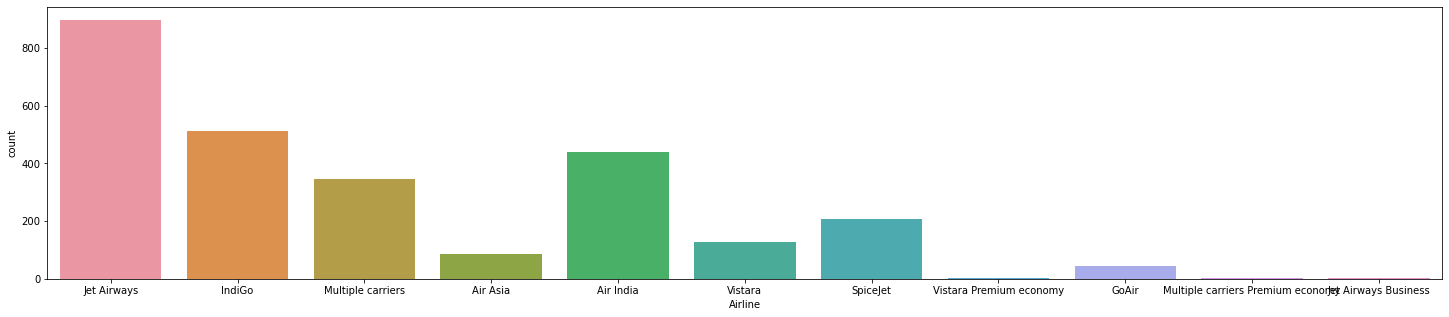

In [130]:
countplt,ax=plt.subplots(figsize=(25,5))
ax=sns.countplot(x="Airline", data=Test_data_nominal)
print(Test_data_nominal["Airline"].value_counts())

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


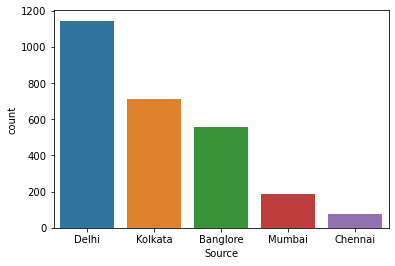

In [131]:
ax=sns.countplot(x="Source", data=Test_data_nominal)
print(Test_data_nominal["Source"].value_counts())

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


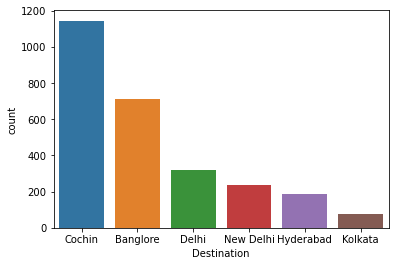

In [132]:
ax=sns.countplot(x="Destination", data=Test_data_nominal)
print(Test_data_nominal["Destination"].value_counts())

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


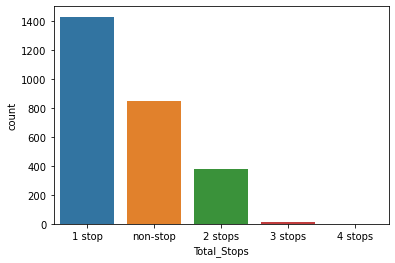

In [133]:
ax=sns.countplot(x="Total_Stops", data=Test_data_nominal)
print(Test_data_nominal["Total_Stops"].value_counts())

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64


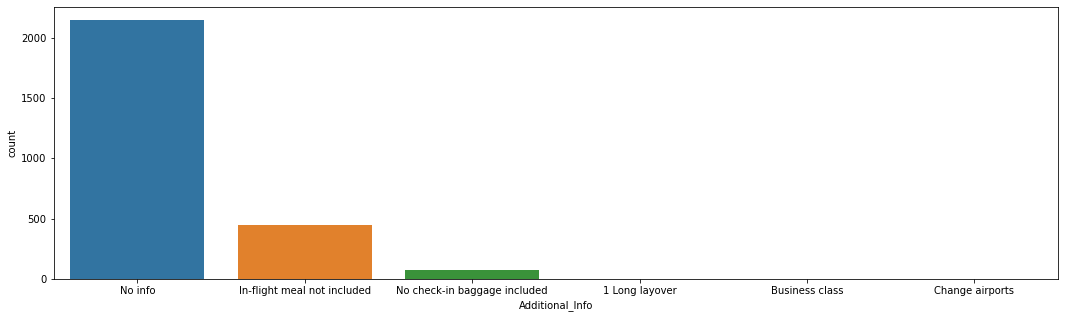

In [134]:
countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Additional_Info", data=Test_data_nominal)
print(Test_data_nominal["Additional_Info"].value_counts())

6     561
3     378
5     374
15    267
21    257
24    255
27    220
18    204
4     155
Name: Date_of_Journey_date, dtype: int64


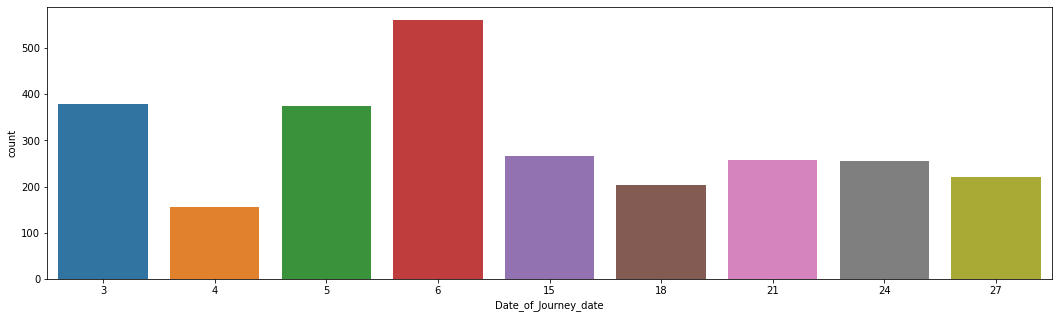

In [135]:
countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Date_of_Journey_date", data=Test_data_nominal)
print(Test_data_nominal["Date_of_Journey_date"].value_counts())

6     650
3     545
5     489
9     363
1     274
12    257
4      93
Name: Date_of_Journey_month, dtype: int64


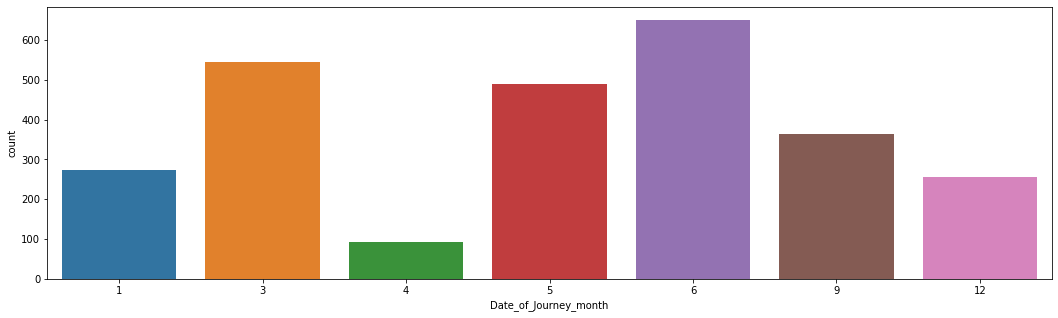

In [136]:
countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Date_of_Journey_month", data=Test_data_nominal)
print(Test_data_nominal["Date_of_Journey_month"].value_counts())

2019    2671
Name: Date_of_Journey_year, dtype: int64


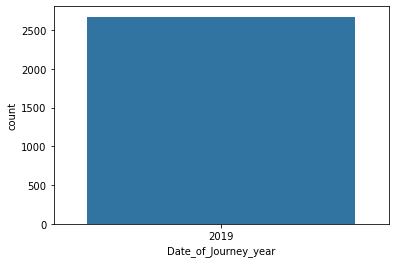

In [137]:
ax=sns.countplot(x="Date_of_Journey_year", data=Test_data_nominal)
print(Test_data_nominal["Date_of_Journey_year"].value_counts())

9     236
7     200
6     176
8     175
20    175
17    152
5     147
19    143
10    141
11    134
21    133
16    132
14    124
15    112
18    109
22     99
13     94
12     54
4      49
2      34
23     28
0      11
1       7
3       6
Name: Dep_Time_hour, dtype: int64


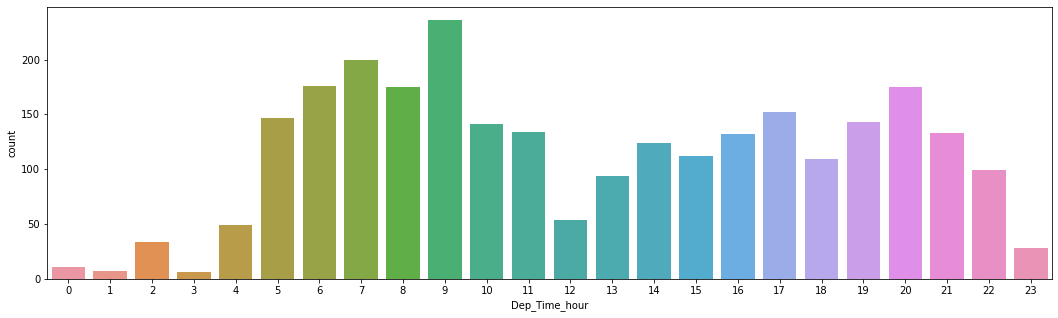

In [138]:
countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Dep_Time_hour", data=Test_data_nominal)
print(Test_data_nominal["Dep_Time_hour"].value_counts())

0     528
30    276
55    274
45    230
10    209
15    184
5     178
50    176
25    173
20    153
35    148
40    142
Name: Dep_Time_minute, dtype: int64


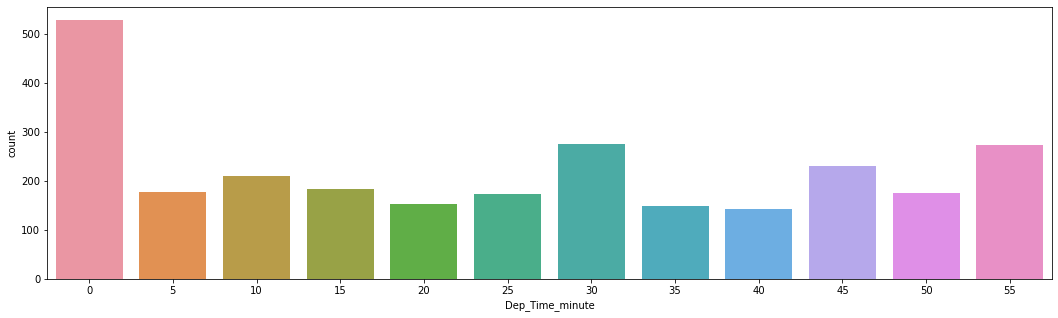

In [139]:
countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Dep_Time_minute", data=Test_data_nominal)
print(Test_data_nominal["Dep_Time_minute"].value_counts())

10    1753
7      154
13     133
2      115
16     109
25      91
22      86
28      77
4       76
19      65
29       4
8        3
11       2
23       1
5        1
20       1
Name: Arrival_Time_date, dtype: int64


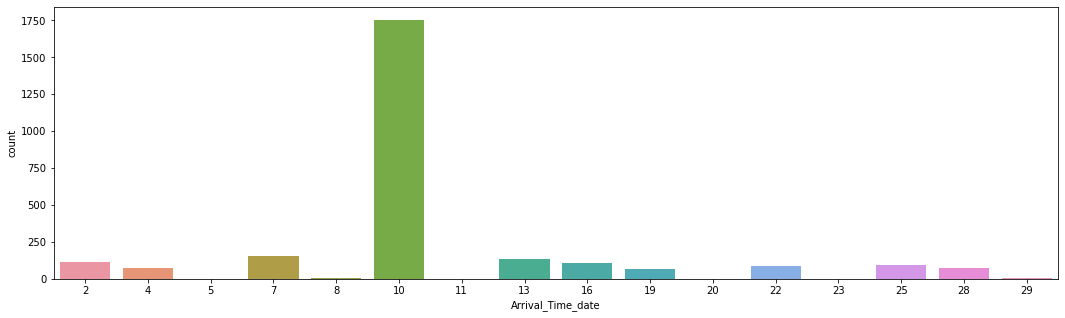

In [140]:
countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Arrival_Time_date", data=Test_data_nominal)
print(Test_data_nominal["Arrival_Time_date"].value_counts())

11    1605
5      357
6      352
3      288
4       69
Name: Arrival_Time_month, dtype: int64


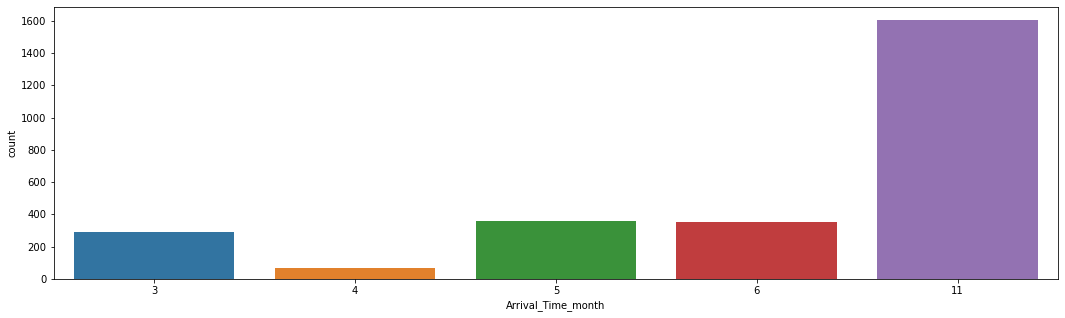

In [141]:
countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Arrival_Time_month", data=Test_data_nominal)
print(Test_data_nominal["Arrival_Time_month"].value_counts())

2021    2671
Name: Arrival_Time_year, dtype: int64


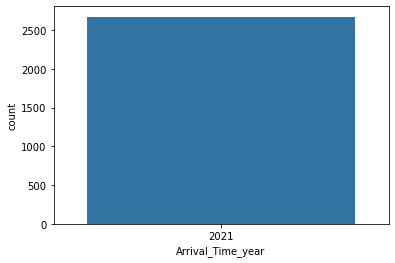

In [142]:
ax=sns.countplot(x="Arrival_Time_year", data=Test_data_nominal)
print(Test_data_nominal["Arrival_Time_year"].value_counts())

19    431
12    198
21    195
22    190
4     175
1     159
18    126
8     123
23    123
10    117
20    112
7     101
9     101
0      89
16     79
11     67
14     65
13     64
17     51
15     40
5      26
3      14
2      13
6      12
Name: Arrival_Time_hour, dtype: int64


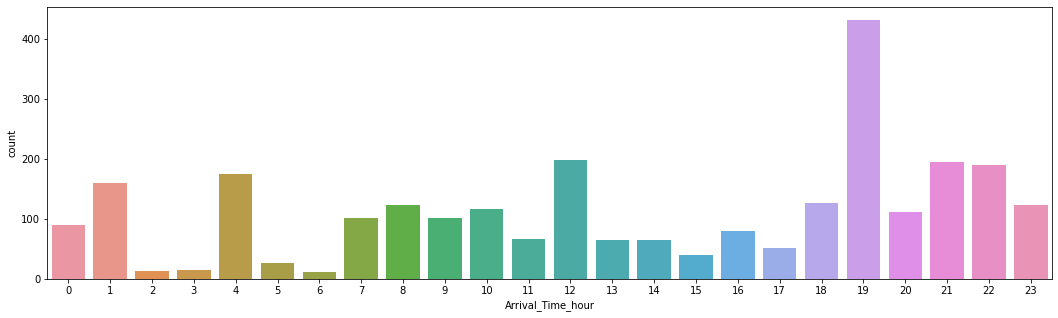

In [143]:
countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Arrival_Time_hour", data=Test_data_nominal)
print(Test_data_nominal["Arrival_Time_hour"].value_counts())

0     381
15    326
25    297
35    254
30    230
20    204
45    192
50    185
5     179
40    156
10    140
55    127
Name: Arrival_Time_minute, dtype: int64


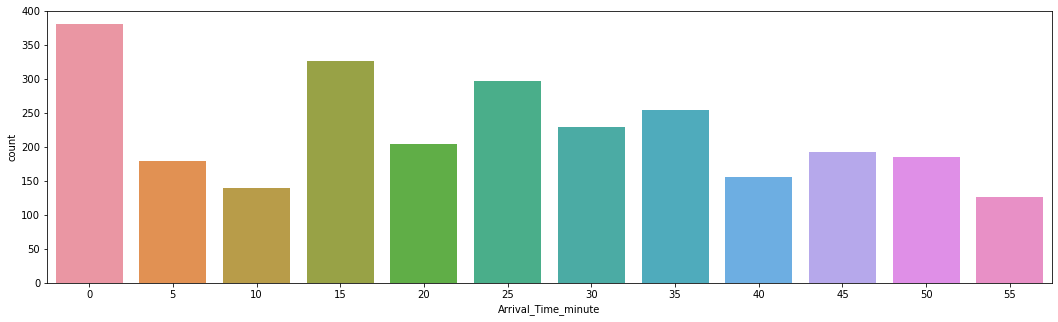

In [144]:

countplt,ax=plt.subplots(figsize=(18,5))
ax=sns.countplot(x="Arrival_Time_minute", data=Test_data_nominal)
print(Test_data_nominal['Arrival_Time_minute'].value_counts())

## Label Encoding String Data

In [145]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [146]:
for i in Test_data.columns:
    if Test_data[i].dtypes=="object":
        Test_data[i]=enc.fit_transform(Test_data[i].values.reshape(-1,1))

In [147]:
Test_data

Airline  Source  Destination  Route  Duration  Total_Stops  \
0         4.0     2.0          1.0   76.0      10.0          0.0   
1         3.0     3.0          0.0   65.0     248.0          0.0   
2         4.0     2.0          1.0   76.0     148.0          0.0   
3         6.0     2.0          1.0   76.0      36.0          0.0   
4         0.0     0.0          2.0   16.0     216.0          4.0   
...       ...     ...          ...    ...       ...          ...   
2666      1.0     3.0          0.0   51.0     150.0          0.0   
2667      3.0     3.0          0.0   43.0     213.0          4.0   
2668      4.0     2.0          1.0   76.0     278.0          0.0   
2669      1.0     2.0          1.0   76.0      60.0          0.0   
2670      6.0     2.0          1.0   76.0      49.0          0.0   

      Additional_Info  Date_of_Journey_date  Date_of_Journey_month  \
0                 5.0                     6                      6   
1                 5.0                     5                     12   
2                 3.0                    21                      5   
3                 5.0                    21                      5   
4                 5.0                    24                      6   
...               ...                   ...                    ...   
2666              5.0                     6                      6   
2667              5.0                    27                      3   
2668              5.0                     3                      6   
2669              5.0                     3                      6   
2670              5.0                    15                      6   

      Date_of_Journey_year  Dep_Time_date  Dep_Time_hour  Dep_Time_minute  \
0                     2019             10             17               30   
1                     2019             10              6               20   
2                     2019             10             19               15   
3                     2019             10              8                0   
4                     2019             10             23               55   
...                    ...            ...            ...              ...   
2666                  2019             10             20               30   
2667                  2019             10             14               20   
2668                  2019             10             21               50   
2669                  2019             10              4                0   
2670                  2019             10              4               55   

      Arrival_Time_date  Arrival_Time_month  Arrival_Time_year  \
0                     7                   6               2021   
1                    10                  11               2021   
2                    22                   5               2021   
3                    10                  11               2021   
4                    25                   6               2021   
...                 ...                 ...                ...   
2666                  7                   6               2021   
2667                 10                  11               2021   
2668                  7                   3               2021   
2669                 10                  11               2021   
2670                 10                  11               2021   

      Arrival_Time_hour  Arrival_Time_minute  
0                     4                   25  
1                    10                   20  
2                    19                    0  
3                    21                    0  
4                     2                   45  
...                 ...                  ...  
2666                 20                   25  
2667                 16                   55  
2668                  4                   25  
2669                 19                   15  
2670                 19                   15  

[2671 rows x 18 columns]

### Checking the distribution of the continous value or the float type columns 

In [148]:
Test_data_continuous=Test_data[["Route","Duration"]].copy()

In [149]:
Test_data_continuous.columns

Index(['Route', 'Duration'], dtype='object')

<AxesSubplot:xlabel='Route', ylabel='Density'>

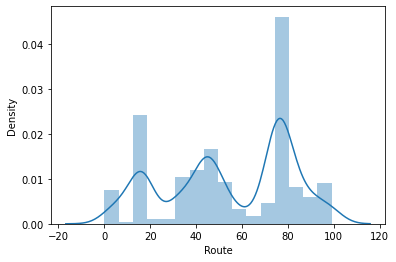

In [150]:
sns.distplot(Test_data_continuous['Route'],kde=True)

From the above distribution plot we can say that the plot is multimodal with several peaks and minimum and maximum value 0 and 100 respectively.

<AxesSubplot:xlabel='Duration', ylabel='Density'>

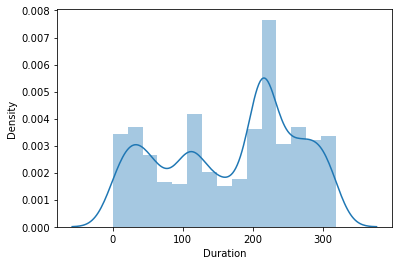

In [151]:
sns.distplot(Test_data_continuous['Duration'],kde=True)

From the above distribution plot we can say that the plot is multimodal with several peaks and minimum and maximum value 0 and 320 respectively.

### Outliers Check


<AxesSubplot:>

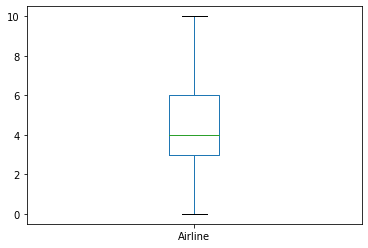

In [152]:
Test_data['Airline'].plot.box()

<AxesSubplot:>

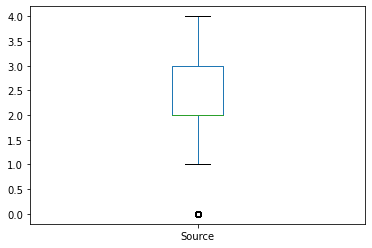

In [153]:
Test_data['Source'].plot.box()

<AxesSubplot:>

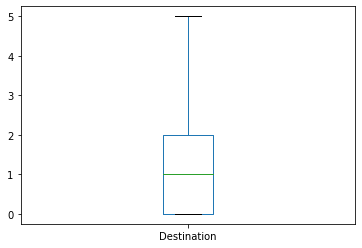

In [154]:
Test_data['Destination'].plot.box()

<AxesSubplot:>

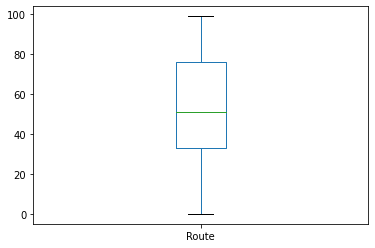

In [155]:
Test_data['Route'].plot.box()

<AxesSubplot:>

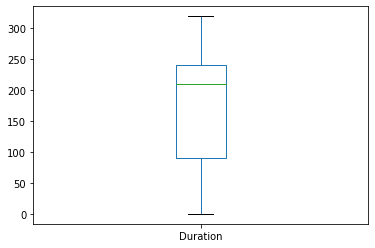

In [156]:
Test_data['Duration'].plot.box()

<AxesSubplot:>

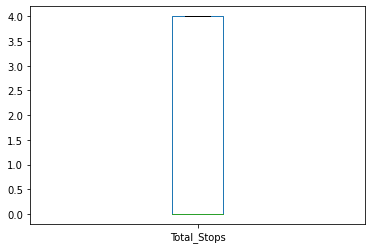

In [157]:
Test_data['Total_Stops'].plot.box()

<AxesSubplot:>

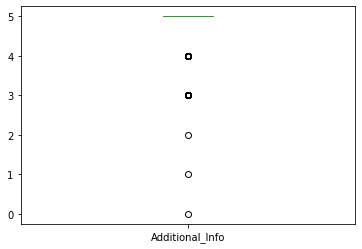

In [158]:
Test_data['Additional_Info'].plot.box()

<AxesSubplot:>

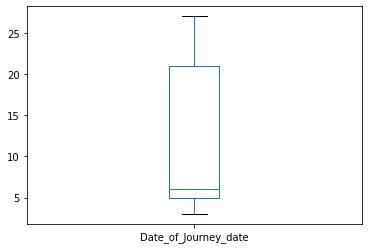

In [159]:
Test_data['Date_of_Journey_date'].plot.box()

<AxesSubplot:>

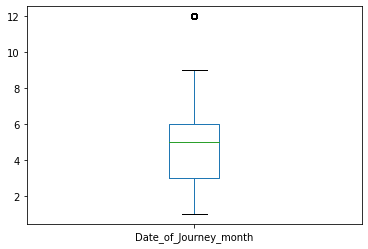

In [160]:
Test_data['Date_of_Journey_month'].plot.box()

<AxesSubplot:>

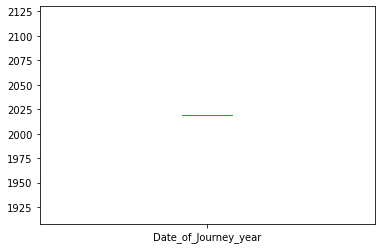

In [161]:
Test_data['Date_of_Journey_year'].plot.box()

<AxesSubplot:>

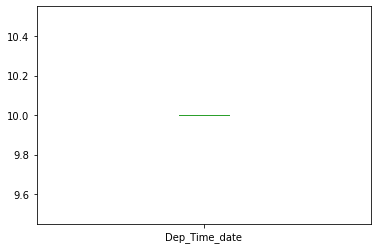

In [162]:

Test_data['Dep_Time_date'].plot.box()

<AxesSubplot:>

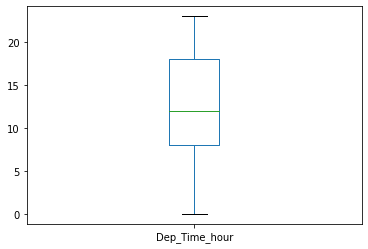

In [163]:
Test_data['Dep_Time_hour'].plot.box()

<AxesSubplot:>

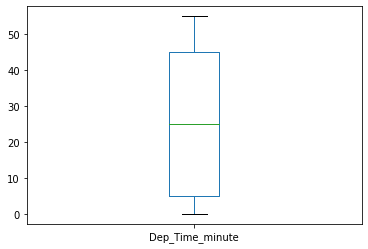

In [164]:
Test_data['Dep_Time_minute'].plot.box()

<AxesSubplot:>

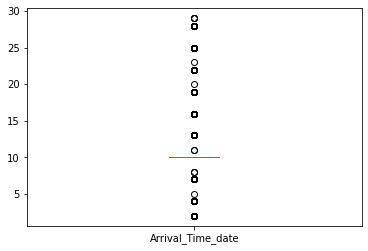

In [165]:
Test_data['Arrival_Time_date'].plot.box()

<AxesSubplot:>

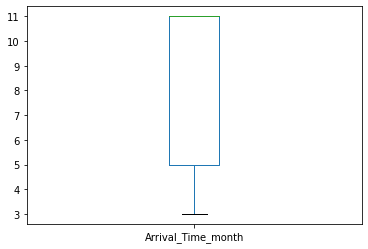

In [166]:
Test_data['Arrival_Time_month'].plot.box()

<AxesSubplot:>

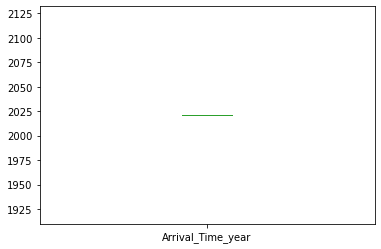

In [167]:
Test_data['Arrival_Time_year'].plot.box()

<AxesSubplot:>

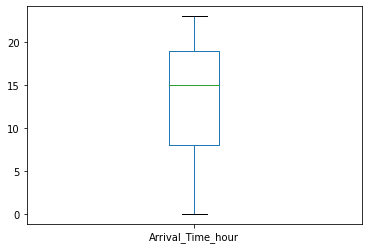

In [168]:
Test_data['Arrival_Time_hour'].plot.box()

<AxesSubplot:>

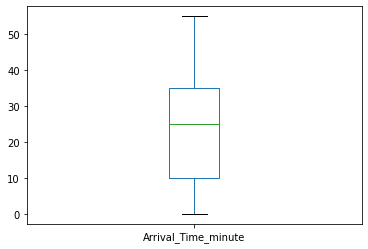

In [169]:
Test_data['Arrival_Time_minute'].plot.box()

From the above boxplots we cam say that column Source,Additional_Info,Date_of_Journey_month,Arrival_Time_date.

## Bivariate Analysis 

In [179]:
Test_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Date_of_Journey_date', 'Date_of_Journey_month',
       'Date_of_Journey_year', 'Dep_Time_date', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_date', 'Arrival_Time_month',
       'Arrival_Time_year', 'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

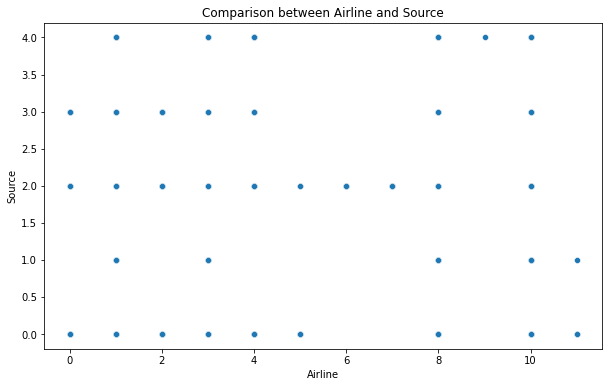

In [170]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Airline and Source')
sns.scatterplot(Flight_price['Airline'], Flight_price['Source']);

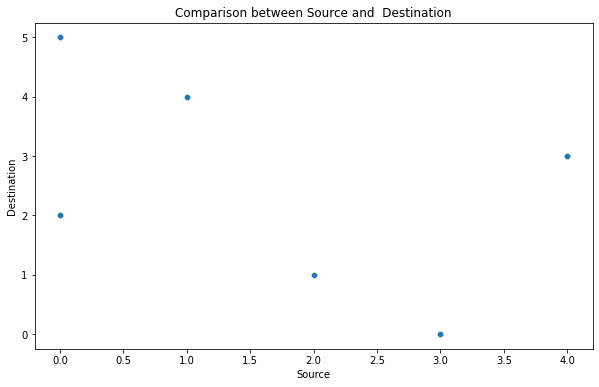

In [171]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Source and  Destination')
sns.scatterplot(Flight_price['Source'], Flight_price['Destination']);

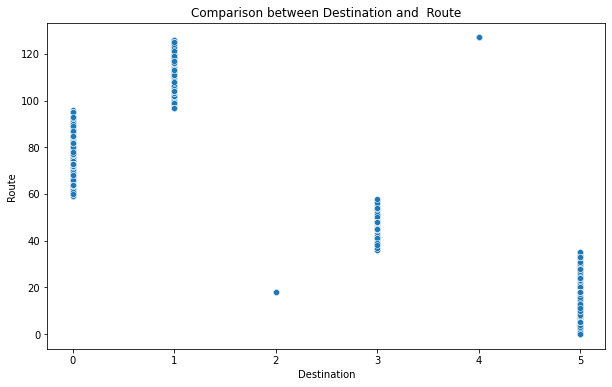

In [172]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Destination and  Route')
sns.scatterplot(Flight_price['Destination'], Flight_price['Route']);

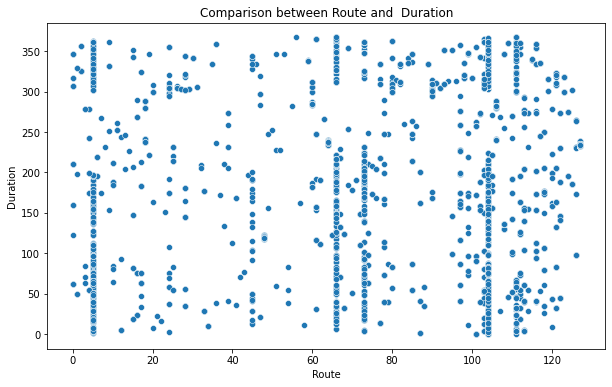

In [173]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Route and  Duration')
sns.scatterplot(Flight_price['Route'], Flight_price['Duration']);

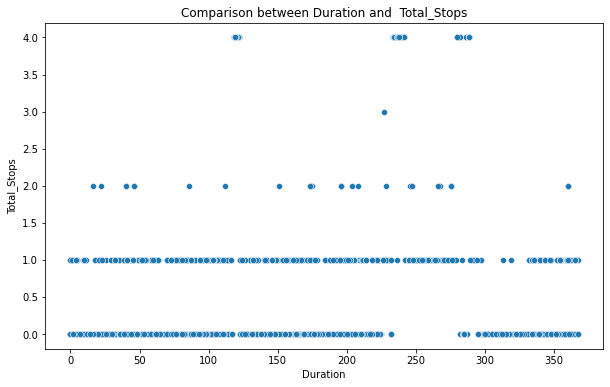

In [174]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Duration and  Total_Stops')
sns.scatterplot(Flight_price['Duration'], Flight_price['Total_Stops']);

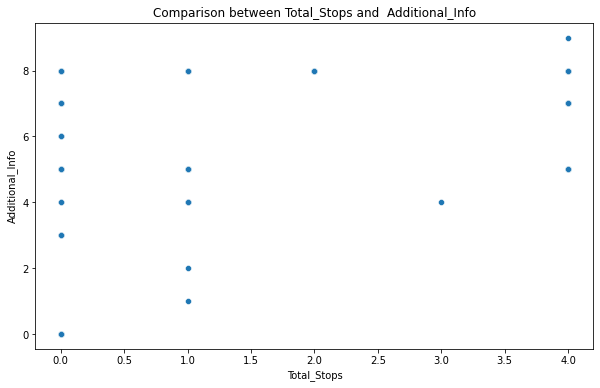

In [175]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Total_Stops and  Additional_Info')
sns.scatterplot(Flight_price['Total_Stops'], Flight_price['Additional_Info']);

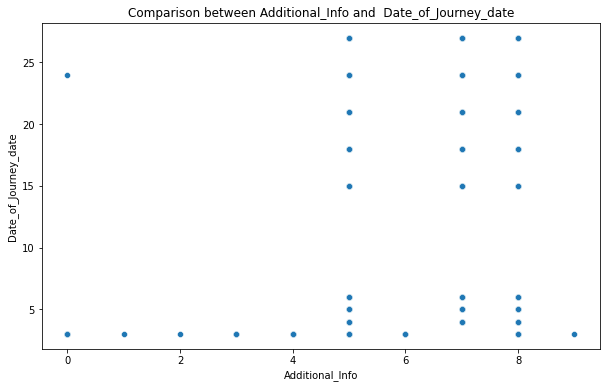

In [176]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Additional_Info and  Date_of_Journey_date')
sns.scatterplot(Flight_price['Additional_Info'], Flight_price['Date_of_Journey_date']);

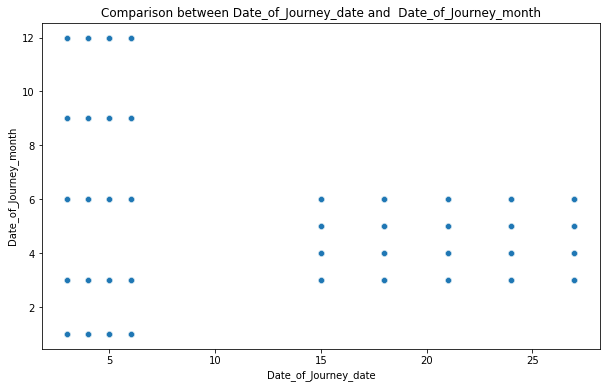

In [177]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Date_of_Journey_date and  Date_of_Journey_month')
sns.scatterplot(Flight_price['Date_of_Journey_date'], Flight_price['Date_of_Journey_month']);

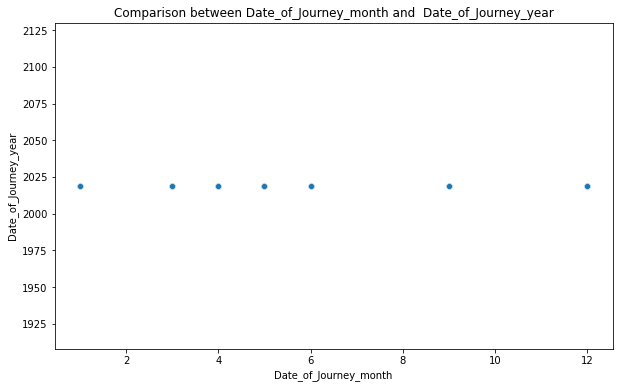

In [178]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Date_of_Journey_month and  Date_of_Journey_year')
sns.scatterplot(Flight_price['Date_of_Journey_month'], Flight_price['Date_of_Journey_year']);

From the above scatterplots we can say that there is no significant correlation can be found in any plot.

In [180]:
Test_data.describe(percentiles=[0.20,0.25,0.40,0.50,0.60,0.75,0.80])

Airline       Source  Destination        Route     Duration  \
count  2671.000000  2671.000000  2671.000000  2671.000000  2671.000000   
mean      3.972669     1.961438     1.432797    54.356421   169.453014   
std       2.295657     1.184328     1.467971    27.128993    93.907162   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.000000     0.000000    33.000000    91.000000   
50%       4.000000     2.000000     1.000000    51.000000   209.000000   
75%       6.000000     3.000000     2.000000    76.000000   241.000000   
max      10.000000     4.000000     5.000000    99.000000   319.000000   

       Total_Stops  Additional_Info  Date_of_Journey_date  \
count  2671.000000      2671.000000           2671.000000   
mean      1.422688         4.634594             12.026956   
std       1.795728         0.760781              8.564408   
min       0.000000         0.000000              3.000000   
25%       0.000000         5.000000              5.000000   
50%       0.000000         5.000000              6.000000   
75%       4.000000         5.000000             21.000000   
max       4.000000         5.000000             27.000000   

       Date_of_Journey_month  Date_of_Journey_year  Dep_Time_date  \
count            2671.000000                2671.0         2671.0   
mean                5.607263                2019.0           10.0   
std                 3.042952                   0.0            0.0   
min                 1.000000                2019.0           10.0   
25%                 3.000000                2019.0           10.0   
50%                 5.000000                2019.0           10.0   
75%                 6.000000                2019.0           10.0   
max                12.000000                2019.0           10.0   

       Dep_Time_hour  Dep_Time_minute  Arrival_Time_date  Arrival_Time_month  \
count    2671.000000      2671.000000        2671.000000         2671.000000   
mean       12.603519        24.891426          11.375140            8.495694   
std         5.686673        19.086522           5.348391            3.163089   
min         0.000000         0.000000           2.000000            3.000000   
25%         8.000000         5.000000          10.000000            5.000000   
50%        12.000000        25.000000          10.000000           11.000000   
75%        18.000000        45.000000          10.000000           11.000000   
max        23.000000        55.000000          29.000000           11.000000   

       Arrival_Time_year  Arrival_Time_hour  Arrival_Time_minute  
count             2671.0        2671.000000          2671.000000  
mean              2021.0          13.585174            24.558218  
std                  0.0           7.040396            16.775436  
min               2021.0           0.000000             0.000000  
25%               2021.0           8.000000            10.000000  
50%               2021.0          15.000000            25.000000  
75%               2021.0          19.000000            35.000000  
max               2021.0          23.000000            55.000000

Mean is higher than median in Destination,Route,Total_Stops,Date_of_Journey_date,Date_of_Journey_month,Arrival_Time_date,so the data is positively skewed in these columns. 

Small gap can be found between 75 percentile and max in Airline,Destination,Route,Duration,Date_of_Journey_date,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_date,Arrival_Time_hour,Arrival_Time_minute so some outliers are present in these columns.

## multivariate analysis

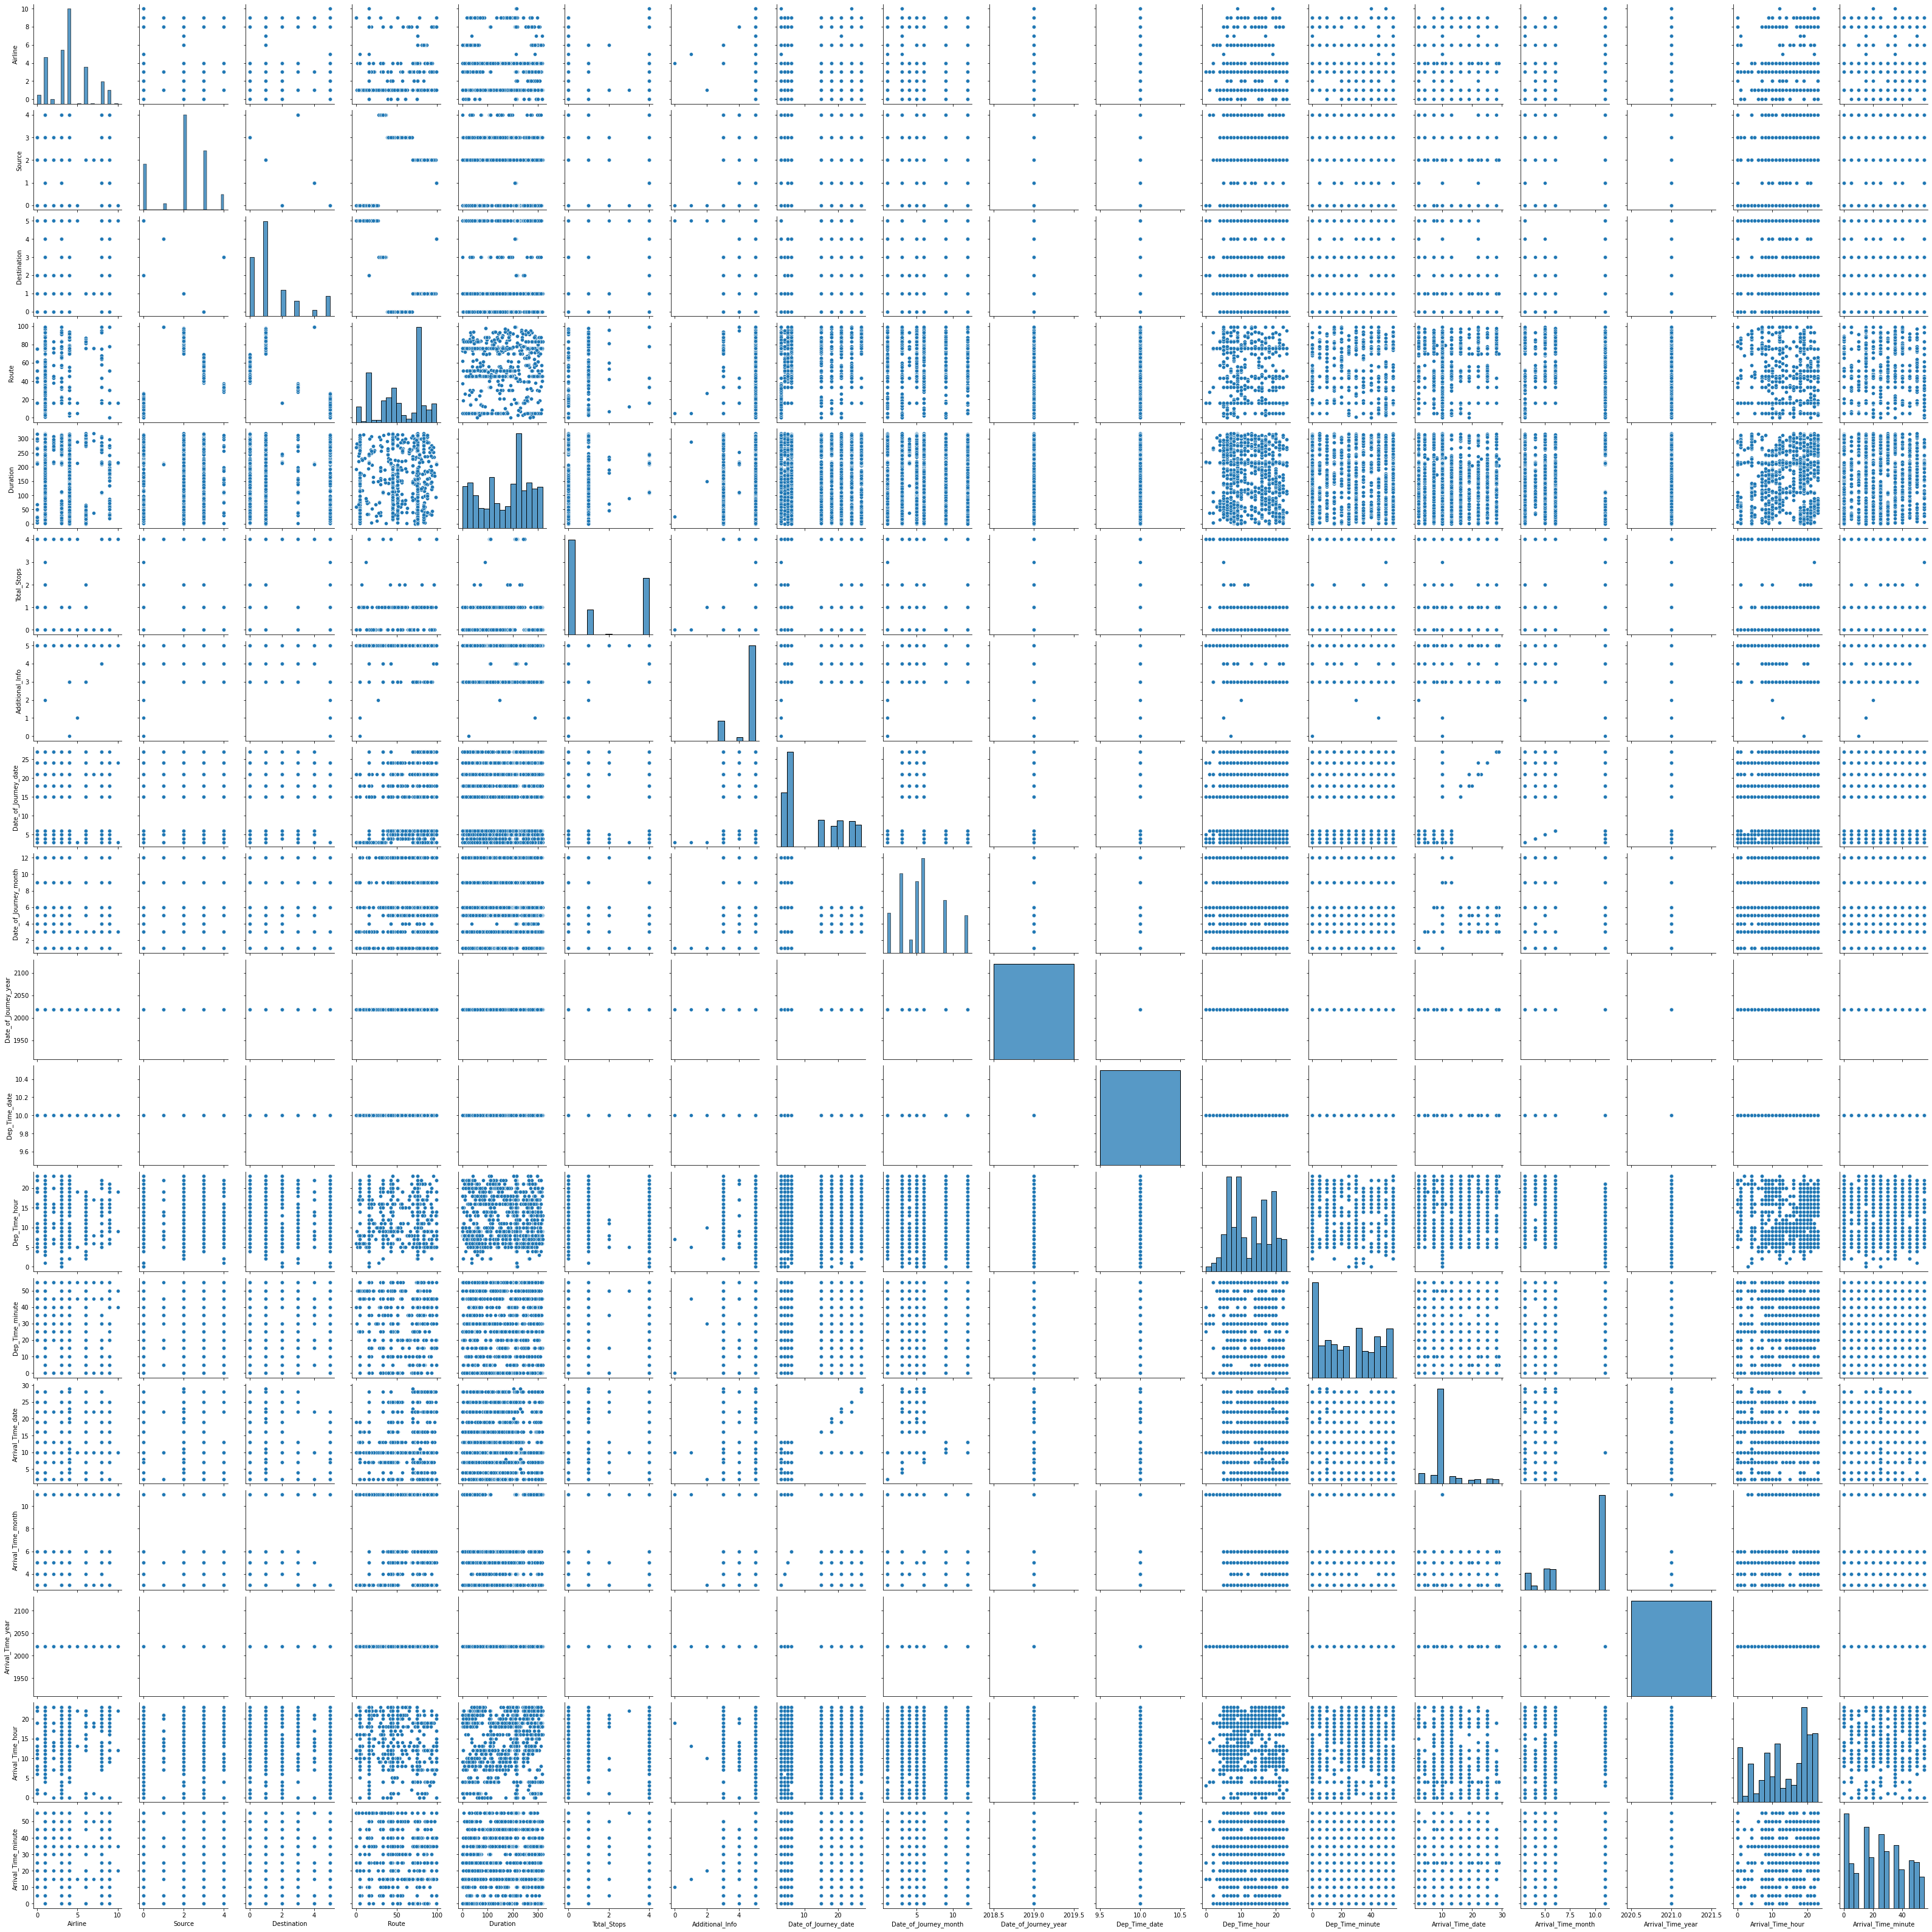

In [181]:
sns.pairplot(Test_data)  

In [182]:
cortest=Test_data.corr()
cortest

Airline    Source  Destination     Route  Duration  \
Airline                1.000000 -0.031107     0.033630  0.023995  0.027559   
Source                -0.031107  1.000000    -0.578296  0.339434 -0.169256   
Destination            0.033630 -0.578296     1.000000 -0.444760 -0.007661   
Route                  0.023995  0.339434    -0.444760  1.000000 -0.053478   
Duration               0.027559 -0.169256    -0.007661 -0.053478  1.000000   
Total_Stops            0.039236 -0.212995     0.331240 -0.441772  0.197855   
Additional_Info       -0.084423 -0.025205     0.026295  0.059682  0.051093   
Date_of_Journey_date   0.005981 -0.026188    -0.022735  0.051829  0.009365   
Date_of_Journey_month  0.002859  0.050773    -0.102206  0.070077 -0.005339   
Date_of_Journey_year        NaN       NaN          NaN       NaN       NaN   
Dep_Time_date               NaN       NaN          NaN       NaN       NaN   
Dep_Time_hour          0.003731  0.056065    -0.049023 -0.137575  0.074146   
Dep_Time_minute       -0.047850 -0.064886     0.153330 -0.045161  0.030295   
Arrival_Time_date     -0.020426  0.043793    -0.104549  0.090888 -0.061797   
Arrival_Time_month     0.119414 -0.092574     0.125022 -0.082992  0.197759   
Arrival_Time_year           NaN       NaN          NaN       NaN       NaN   
Arrival_Time_hour     -0.018313  0.001719    -0.004945  0.003447  0.041983   
Arrival_Time_minute   -0.097714 -0.008304     0.037196 -0.213024  0.082718   

                       Total_Stops  Additional_Info  Date_of_Journey_date  \
Airline                   0.039236        -0.084423              0.005981   
Source                   -0.212995        -0.025205             -0.026188   
Destination               0.331240         0.026295             -0.022735   
Route                    -0.441772         0.059682              0.051829   
Duration                  0.197855         0.051093              0.009365   
Total_Stops               1.000000         0.136402              0.072098   
Additional_Info           0.136402         1.000000             -0.021366   
Date_of_Journey_date      0.072098        -0.021366              1.000000   
Date_of_Journey_month    -0.066047        -0.008463             -0.258004   
Date_of_Journey_year           NaN              NaN                   NaN   
Dep_Time_date                  NaN              NaN                   NaN   
Dep_Time_hour             0.072496        -0.072889             -0.022912   
Dep_Time_minute           0.051715         0.007971             -0.025724   
Arrival_Time_date        -0.093183        -0.080620              0.527344   
Arrival_Time_month        0.318044         0.138487              0.066422   
Arrival_Time_year              NaN              NaN                   NaN   
Arrival_Time_hour        -0.097218         0.010917              0.015416   
Arrival_Time_minute       0.196301         0.034007             -0.010006   

                       Date_of_Journey_month  Date_of_Journey_year  \
Airline                             0.002859                   NaN   
Source                              0.050773                   NaN   
Destination                        -0.102206                   NaN   
Route                               0.070077                   NaN   
Duration                           -0.005339                   NaN   
Total_Stops                        -0.066047                   NaN   
Additional_Info                    -0.008463                   NaN   
Date_of_Journey_date               -0.258004                   NaN   
Date_of_Journey_month               1.000000                   NaN   
Date_of_Journey_year                     NaN                   NaN   
Dep_Time_date                            NaN                   NaN   
Dep_Time_hour                       0.007080                   NaN   
Dep_Time_minute                     0.001781                   NaN   
Arrival_Time_date                   0.065000                   NaN   
Arrival_Time_month         

<AxesSubplot:>

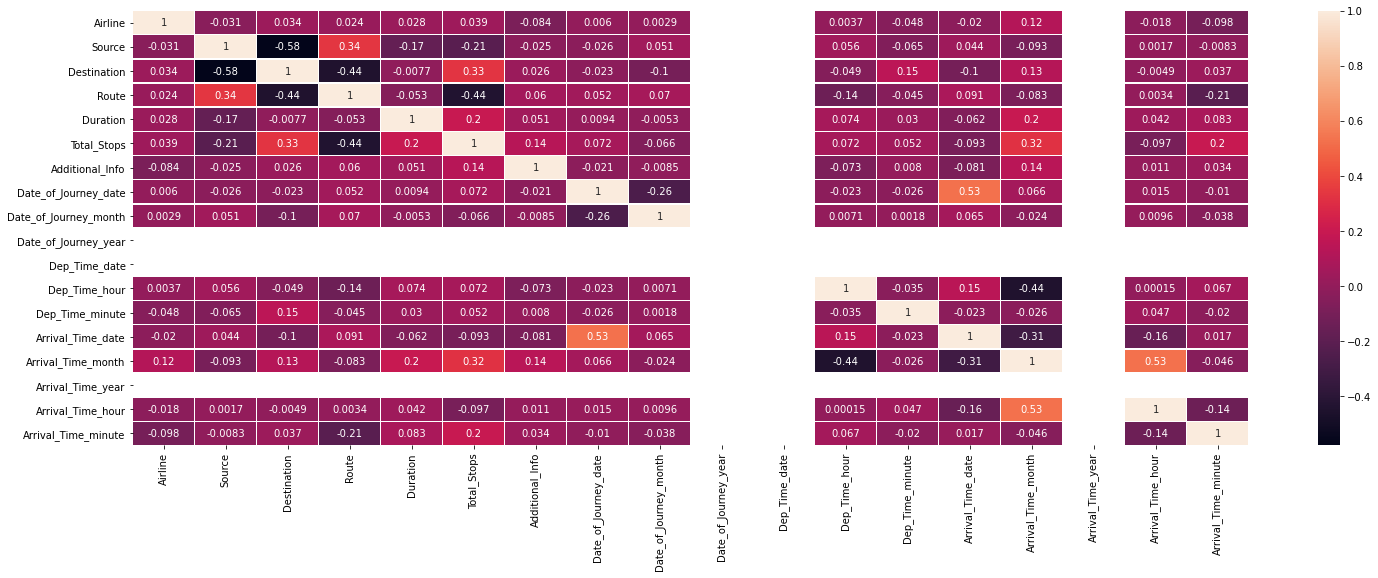

In [183]:
import matplotlib.pyplot as plt  # Sample figsize in inches
fig, ax = plt.subplots(figsize=(25,8))        
sns.heatmap(cortest, annot=True, linewidths=.5, ax=ax)

In [184]:
Test_data=Test_data.drop('Dep_Time_date', axis=1)

### Considering the outlier removal

In [185]:
#removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(Test_data))
z

array([[0.01190758, 0.03256662, 0.29488167, ...,        nan, 1.36170869,
        0.02633999],
       [0.42377921, 0.87708559, 0.97622158, ...,        nan, 0.50932437,
        0.27177067],
       [0.01190758, 0.03256662, 0.29488167, ...,        nan, 0.76925212,
        1.46421332],
       ...,
       [0.01190758, 0.03256662, 0.29488167, ...,        nan, 1.36170869,
        0.02633999],
       [1.29515278, 0.03256662, 0.29488167, ...,        nan, 0.76925212,
        0.56988133],
       [0.88328115, 0.03256662, 0.29488167, ...,        nan, 0.76925212,
        0.56988133]])

In [186]:
threshold=3
print(np.where(z>3))

(array([  31,  145,  166,  178,  189,  221,  251,  258,  266,  371,  390,
        424,  446,  454,  482,  497,  503,  552,  565,  568,  596,  609,
        651,  683,  696,  704,  725,  757,  765,  793,  856,  884,  902,
        903,  954,  997, 1012, 1056, 1080, 1174, 1255, 1388, 1389, 1432,
       1479, 1491, 1542, 1564, 1643, 1696, 1727, 1742, 1789, 1802, 1817,
       1861, 1893, 1903, 1947, 2023, 2040, 2072, 2103, 2109, 2114, 2115,
       2125, 2182, 2270, 2310, 2318, 2360, 2369, 2395, 2400, 2401, 2424,
       2448, 2472, 2527, 2562, 2587, 2624, 2661], dtype=int64), array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12,  6, 12,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype=int64))


In [187]:
Test_data_new=Test_data[(z<3).all(axis=1)]

In [188]:
Test_data_new

Empty DataFrame
Columns: [Airline, Source, Destination, Route, Duration, Total_Stops, Additional_Info, Date_of_Journey_date, Date_of_Journey_month, Date_of_Journey_year, Dep_Time_hour, Dep_Time_minute, Arrival_Time_date, Arrival_Time_month, Arrival_Time_year, Arrival_Time_hour, Arrival_Time_minute]
Index: []

## Skewness Checking and Removal

In [189]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Test_data, method='yeo-johnson')
x_new

array([[ 0.12169898, -0.02026559,  0.00398423, ...,  0.        ,
        -1.36181747,  0.17499257],
       [-0.32449908,  0.88770502, -1.37855173, ...,  0.        ,
        -0.52579004, -0.10046375],
       [ 0.12169898, -0.02026559,  0.00398423, ...,  0.        ,
         0.76976095, -1.73155891],
       ...,
       [ 0.12169898, -0.02026559,  0.00398423, ...,  0.        ,
        -1.36181747,  0.17499257],
       [-1.41087141, -0.02026559,  0.00398423, ...,  0.        ,
         0.76976095, -0.40157188],
       [ 0.9055691 , -0.02026559,  0.00398423, ...,  0.        ,
         0.76976095, -0.40157188]])

In [190]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_scaled=SC.fit_transform(x_new)
x_scaled

array([[ 0.12169898, -0.02026559,  0.00398423, ...,  0.        ,
        -1.36181747,  0.17499257],
       [-0.32449908,  0.88770502, -1.37855173, ...,  0.        ,
        -0.52579004, -0.10046375],
       [ 0.12169898, -0.02026559,  0.00398423, ...,  0.        ,
         0.76976095, -1.73155891],
       ...,
       [ 0.12169898, -0.02026559,  0.00398423, ...,  0.        ,
        -1.36181747,  0.17499257],
       [-1.41087141, -0.02026559,  0.00398423, ...,  0.        ,
         0.76976095, -0.40157188],
       [ 0.9055691 , -0.02026559,  0.00398423, ...,  0.        ,
         0.76976095, -0.40157188]])

### Predicting Price from the test-data

In [191]:
predicted_Price = Final_model.predict(x_scaled)

In [192]:
Predicted_Price=pd.DataFrame(predicted_Price)
Predicted_Price=Predicted_Price.astype(int)

In [193]:
Predicted_Price

0
0     14123
1      5399
2     10610
3     10527
4      4205
...     ...
2666   7833
2667   5429
2668  11314
2669   7833
2670  10527

[2671 rows x 1 columns]